# ANALISIS DERET WAKTU

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import zscore
from scipy.stats import probplot
from scipy.stats import shapiro
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from sklearn.metrics import mean_squared_error, mean_absolute_error



In [3]:
# ===========================================
# IMPORT DATA
# ===========================================

# Membaca data dari file CSV
file_path = "C:/Users/user/Downloads/MY MAGANG 5/DATA TELKOMSEL/SCHOOL/output_school_dataa.csv"

data = pd.read_csv(file_path, sep=';')  # Ganti dengan pemisah yang sesuai
# Tampilkan DataFrame
data

# variabel Data
# data.columns

# Tipe data
# data.dtypes


,PERIODE,PERIODE DATE,DAY NAME,AGENT ID,USER ID,USER NAME,USER TYPE,AREA,REGIONAL,BRANCH,...,LEVEL,PJP FREQUENCY,DISPOSED DAY,DISPOSED STATUS,PJP CHECKIN,PJP EXTRA,CHECKIN TIME,CHECKOUT TIME,DURATION (MINUTE),CHECKIN VALID
0,202401,1/1/2024,SENIN,9903006180,"6,29E+12",ICAH,BUDDIES by.U,JABOTABEK & JABAR,WESTERN JABOTABEK,SERANG,...,SMP,F2,SENIN,UNDISPOSED,Y,N,1/1/2024 15:31,1/1/2024 20:14,282,Y
1,202401,1/1/2024,SENIN,9903000696,"6,28E+12",ALEXANDER GAT ASER LALU,DSS,JAWA - BALI - NUSRA,BALI NUSRA,FLORES,...,UNIVERSITAS,F2,SENIN,DISPOSED,Y,N,1/1/2024 18:57,1/1/2024 21:31,153,Y
2,202401,1/1/2024,SENIN,9903000696,"6,28E+12",ALEXANDER GAT ASER LALU,DSS,JAWA - BALI - NUSRA,BALI NUSRA,FLORES,...,SMA,F2,SENIN,DISPOSED,Y,N,1/1/2024 18:15,1/1/2024 18:57,41,Y
3,202401,1/1/2024,SENIN,9903006667,"6,28E+12",SURYADITO MAULANA ROSIHAN,DSS,JAWA - BALI - NUSRA,BALI NUSRA,MATARAM,...,SMA,F2,SENIN,DISPOSED,Y,N,1/1/2024 16:18,1/1/2024 18:10,112,Y
4,202401,1/1/2024,SENIN,9903006667,"6,28E+12",SURYADITO MAULANA ROSIHAN,DSS,JAWA - BALI - NUSRA,BALI NUSRA,MATARAM,...,SMA,F2,SENIN,DISPOSED,Y,N,1/1/2024 20:08,1/1/2024 20:42,34,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129714,202410,10/9/2024,RABU,9903006628,"6,29E+12",NORA ASRIANI,DSS,SUMATERA,SUMBAGUT,MEDAN,...,SMP,F2,RABU,DISPOSED,Y,N,10/9/2024 11:09,10/9/2024 11:50,40,Y
129715,202410,10/9/2024,RABU,9903006636,"6,28E+12",NIA INDAH LESTARI NASUTION,DSS,SUMATERA,SUMBAGUT,MEDAN,...,SMA,F2,JUMAT,DISPOSED,Y,Y,10/9/2024 11:40,10/9/2024 12:12,32,N
129716,202410,10/9/2024,RABU,9903010496,"6,28E+12",AYU LISTIANA,DSS,SUMATERA,SUMBAGUT,MEDAN,...,SMA,F2,RABU,DISPOSED,Y,Y,10/9/2024 7:36,10/9/2024 8:45,69,N
129717,202410,10/9/2024,RABU,9903009079,"6,28E+12",CANDRA PRASETYO,DSS,SUMATERA,SUMBAGUT,PADANG SIDEMPUAN,...,SMA,F2,RABU,DISPOSED,Y,N,10/9/2024 10:01,10/9/2024 10:13,12,N


LEVEL,PERIODE DATE,KURSUS,PESANTREN,PKBM,SD,SKB,SLB,SMA,SMP,SPK,TK,UNIVERSITAS
0,2024-01-01,0,0,0,191,0,0,67,179,0,0,227
1,2024-01-02,54,0,0,92,0,63,73,80,125,54,124
2,2024-01-03,0,0,0,81,0,71,88,64,0,39,92
3,2024-01-04,66,0,0,73,0,0,85,75,0,128,91
4,2024-01-05,0,0,0,73,0,33,83,91,0,145,106
...,...,...,...,...,...,...,...,...,...,...,...,...
269,2024-10-04,0,0,0,60,0,135,65,54,0,206,56
270,2024-10-05,0,0,0,61,0,0,60,69,0,170,135
271,2024-10-07,0,0,0,62,0,80,60,53,0,103,45
272,2024-10-08,369,0,0,52,0,60,57,54,0,98,74


LEVEL,PERIODE DATE,KURSUS,PESANTREN,PKBM,SD,SKB,SLB,SMA,SMP,SPK,TK,UNIVERSITAS,Total Kunjungan (MINUTE)
0,2024-01-01,0,0,0,191,0,0,67,179,0,0,227,664
1,2024-01-02,54,0,0,92,0,63,73,80,125,54,124,665
2,2024-01-03,0,0,0,81,0,71,88,64,0,39,92,435
3,2024-01-04,66,0,0,73,0,0,85,75,0,128,91,518
4,2024-01-05,0,0,0,73,0,33,83,91,0,145,106,531
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2024-10-04,0,0,0,60,0,135,65,54,0,206,56,576
270,2024-10-05,0,0,0,61,0,0,60,69,0,170,135,495
271,2024-10-07,0,0,0,62,0,80,60,53,0,103,45,403
272,2024-10-08,369,0,0,52,0,60,57,54,0,98,74,764


LEVEL
PERIODE DATE                 0
KURSUS                      59
PESANTREN                   20
PKBM                         5
SD                          40
SKB                         23
SLB                         19
SMA                         24
SMP                         27
SPK                         20
TK                           4
UNIVERSITAS                  9
Total Kunjungan (MINUTE)    17
dtype: Int64

Jumlah outlier setelah penanganan Z-score per kolom:
LEVEL
KURSUS                      8
PESANTREN                   8
PKBM                        2
SD                          0
SKB                         7
SLB                         6
SMA                         2
SMP                         7
SPK                         8
TK                          1
UNIVERSITAS                 3
Total Kunjungan (MINUTE)    1
dtype: int64

Data setelah Z-score normalization dengan pembatasan:


LEVEL,PERIODE DATE,KURSUS,PESANTREN,PKBM,SD,SKB,SLB,SMA,SMP,SPK,TK,UNIVERSITAS,Total Kunjungan (MINUTE)
0,2024-01-01,0,0,0,0,0,0,67,179,0,0,227,664
1,2024-01-02,54,0,0,92,0,63,73,80,0,54,124,665
2,2024-01-03,0,0,0,81,0,71,88,64,0,39,92,435
3,2024-01-04,66,0,0,73,0,0,85,75,0,128,91,518
4,2024-01-05,0,0,0,73,0,33,83,91,0,145,106,531
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2024-10-04,0,0,0,60,0,135,65,54,0,206,56,576
270,2024-10-05,0,0,0,61,0,0,60,69,0,170,135,495
271,2024-10-07,0,0,0,62,0,80,60,53,0,103,45,403
272,2024-10-08,0,0,0,52,0,60,57,54,0,98,74,764


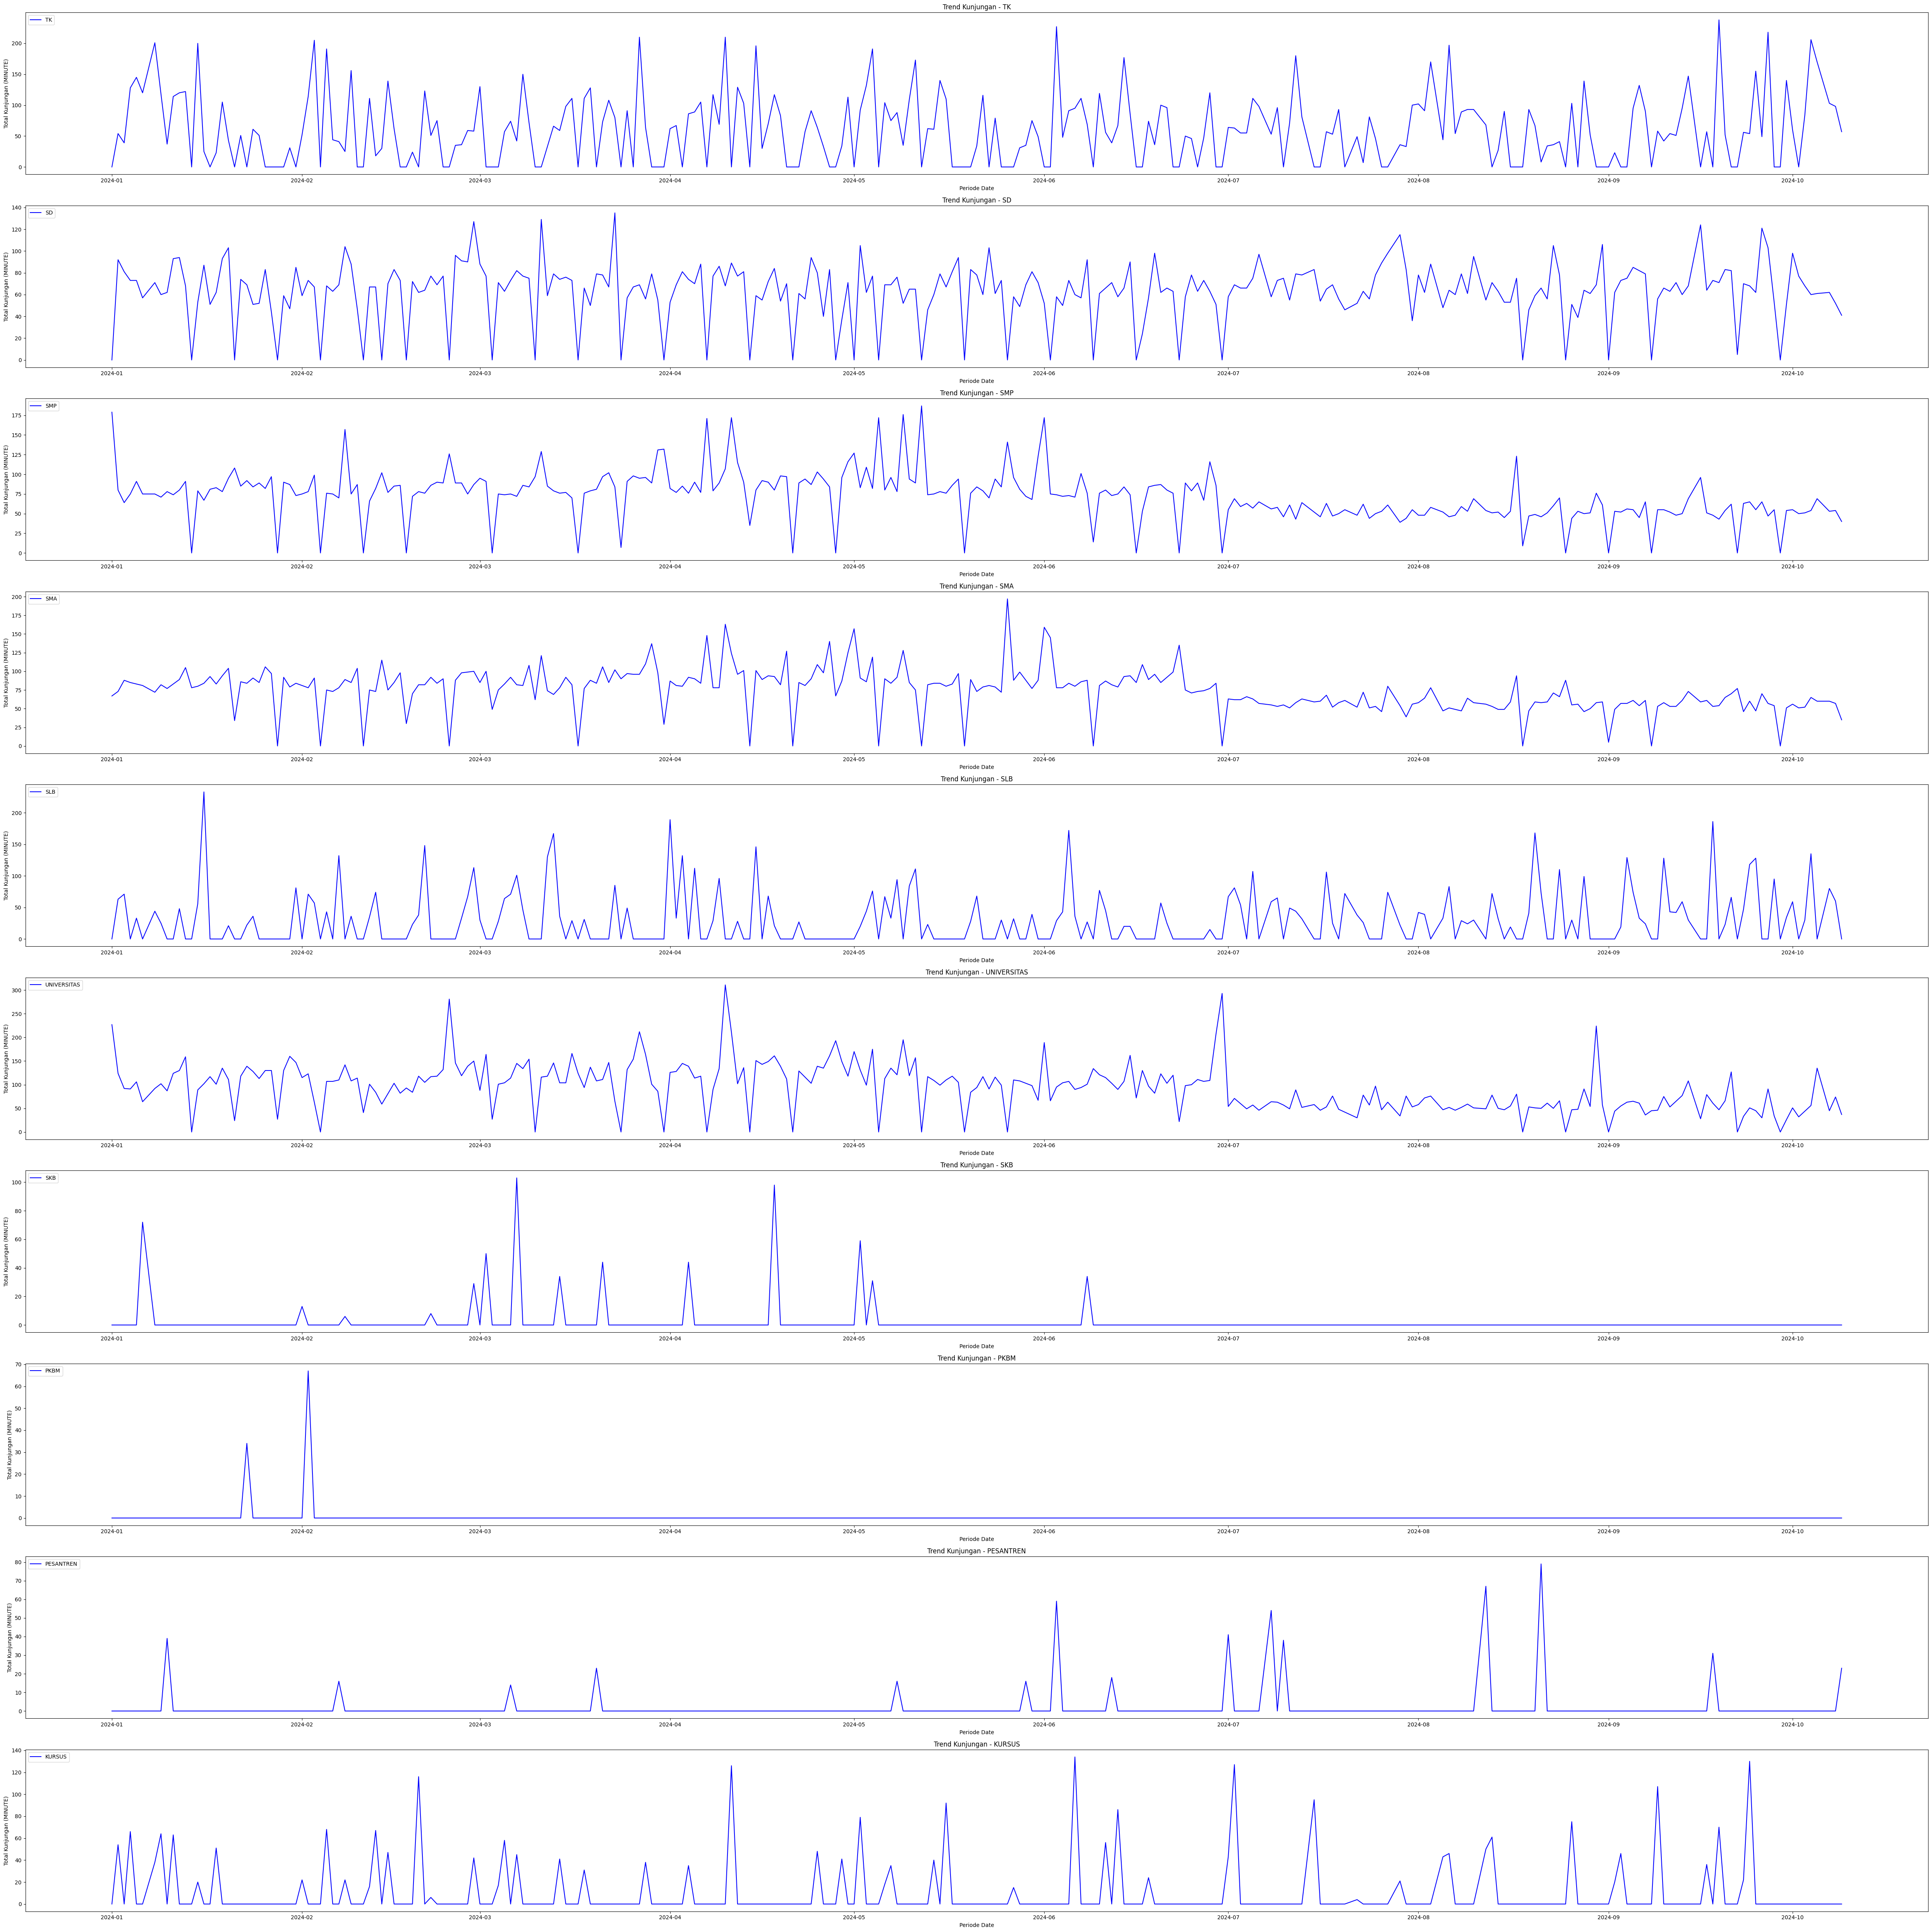

LEVEL
TK             16421
SD             16992
SMP            19754
SMA            20384
SLB             8153
UNIVERSITAS    25603
SKB              625
PKBM             101
PESANTREN        534
KURSUS          2817
dtype: int64


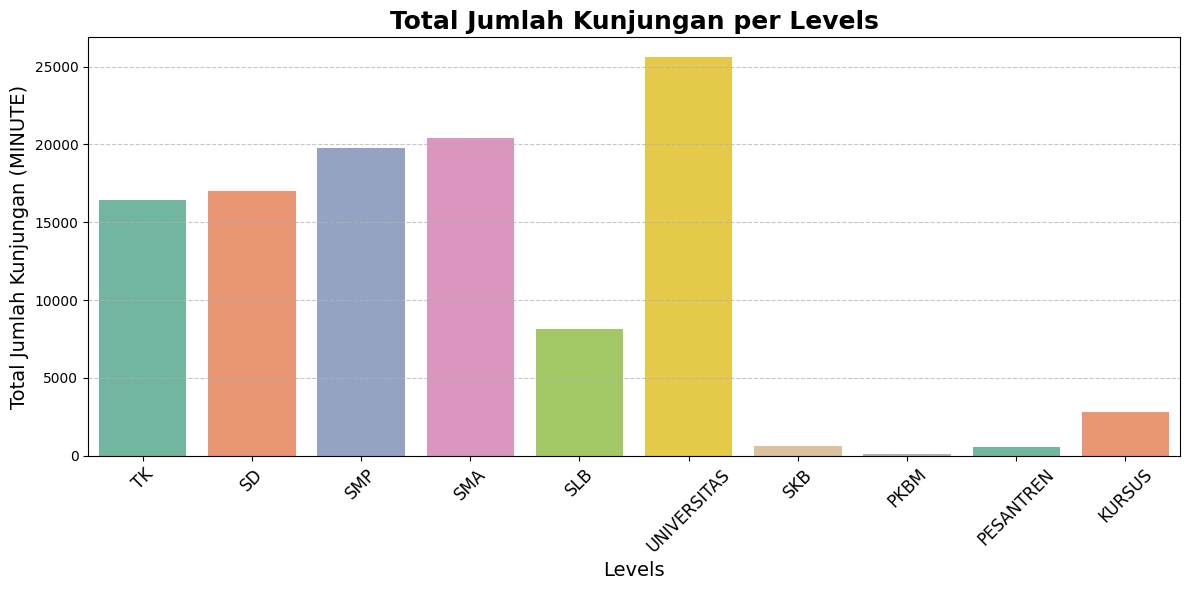

In [6]:
# ===========================================
# MENGUBAH TIPE DATA
# ===========================================

# Mengubah tipe data untuk kolom yang dipilih
data['PERIODE DATE'] = pd.to_datetime(data['PERIODE DATE'])  # Mengubah menjadi datetime

# Memilih kolom yang relevan
data_selected = data[['PERIODE DATE', 'LEVEL', 'DURATION (MINUTE)']]

# Membuat pivot table, untuk setiap LEVEL akan menjadi kolom terpisah
pivot_data = data_selected.pivot_table(
    index='PERIODE DATE',               # Set index berdasarkan 'PERIODE DATE'
    columns='LEVEL',                    # Set kolom berdasarkan 'LEVEL'
    values='DURATION (MINUTE)'         # Isi dengan 'DURATION (MINUTE)'
   
)

# Mengisi Nan dengan 0
pivot_data_filled = pivot_data.fillna(0)

# # Mengubah tipe data setiap kolom yang berisi durasi dari float ke int64
for column in pivot_data_filled.columns:
    pivot_data_filled[column] = pivot_data_filled[column].astype('int64')

# # Reset index untuk membuat data lebih mudah dibaca
pivot_data_filled = pivot_data_filled.reset_index()

# Tampilkan hasilnya
display(pivot_data_filled)

# pivot_data_filled.dtypes

# ===========================================
# GRUP DATA
# ===========================================

# Mengelompokkan data berdasarkan 'PERIODE DATE' dan menjumlahkan nilai 'DURATION (MINUTE)'
grouped_dat = pivot_data_filled.groupby('PERIODE DATE').sum()

# Menambahkan kolom 'Total Kunjungan (MINUTE)' yang merupakan jumlah dari seluruh interaksi untuk setiap tanggal
grouped_dat['Total Kunjungan (MINUTE)'] = grouped_dat.sum(axis=1)

# Mengubah tipe data 'Total Kunjungan (MINUTE)' menjadi Int64
grouped_dat['Total Kunjungan (MINUTE)'] = grouped_dat['Total Kunjungan (MINUTE)'].astype('Int64')

# Mengubah 'PERIODE DATE' dari indeks menjadi kolom biasa
grouped_dat.reset_index(inplace=True)

# Menampilkan hasilnya
display(grouped_dat)
# grouped_dat.dtypes

# ===================================================

# ===========================================
#  MENGECEK OUTLIER
# ===========================================

# Mengecek Outlier
# Menghitung IQR untuk setiap kolom
Q1 = grouped_dat.quantile(0.25)
Q3 = grouped_dat.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk deteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menandai outlier berdasarkan IQR
outliers_iqr = (grouped_dat < lower_bound) | (grouped_dat > upper_bound)

# # Menampilkan jumlah outlier per kolom
# print("Jumlah outlier berdasarkan IQR per kolom:")
print(outliers_iqr.sum())

# Menampilkan baris dengan outlier
outlier_rows_iqr = grouped_dat[outliers_iqr.any(axis=1)]
# # print("\nBaris dengan outlier berdasarkan IQR:")
# display(outlier_rows_iqr)

# ===========================================
# MENANGANI OUTLIER
# ===========================================


# Salin data untuk memproses
grouped_data = grouped_dat.copy()

# Pilih hanya kolom numerik
numeric_columns = grouped_data.select_dtypes(include=[np.number]).columns

# Hitung Z-score hanya untuk kolom numerik
z_scores = grouped_data[numeric_columns].apply(zscore)

# Membatasi Z-score lebih dari 3 atau kurang dari -3
grouped_data[numeric_columns] = grouped_data[numeric_columns].where(abs(z_scores) <= 3, np.nan)

# Ganti NaN dengan 0 pada kolom numerik
grouped_data[numeric_columns] = grouped_data[numeric_columns].fillna(0)

# Ubah tipe data menjadi int64 untuk kolom numerik
grouped_data[numeric_columns] = grouped_data[numeric_columns].astype('int64')

# Hitung Z-score setelah penanganan
z_scores_after = grouped_data[numeric_columns].apply(zscore)

# Menandai outlier setelah penanganan
outliers_after = abs(z_scores_after) > 3

# Menghitung jumlah outlier setelah penanganan untuk setiap kolom
jumlah_outliers_after_per_column = outliers_after.sum()

# Menampilkan jumlah outlier setelah penanganan Z-score per kolom
print("\nJumlah outlier setelah penanganan Z-score per kolom:")
print(jumlah_outliers_after_per_column)

print("\nData setelah Z-score normalization dengan pembatasan:")
display(grouped_data)

# ===================================================
# grouped_data.dtypes
# grouped_data.info()
# display(grouped_data.describe())

# # Cek nilai yang hilang
# print(grouped_data.isnull().sum())

# ==========================


# ===========================================
# GRAFIK INTERAKSI TINGKAT SEKOLAH
# ===========================================


# Daftar level yang tersedia dalam data
levels = ['TK', 'SD', 'SMP', 'SMA', 'SLB','UNIVERSITAS', 'SKB', 'PKBM', 'PESANTREN', 'KURSUS']  	

# Membuat figure dengan ukuran tertentu
plt.figure(figsize=(50, 50))

# Looping untuk setiap level
for i, level in enumerate(levels, 1):
    plt.subplot(len(levels), 1, i)  # Membuat subplot untuk setiap level
    plt.plot(grouped_data['PERIODE DATE'], grouped_data[level], label=level, color='blue')
    plt.title(f'Trend Kunjungan - {level}')
    plt.xlabel('Periode Date')
    plt.ylabel('Total Kunjungan (MINUTE)')
    plt.legend(loc="upper left")

# Menata layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()

# ==============================

#  TOTAL DAN GRAFIK JUMLAH INTERAKSI PADA SEKOLAH

# Menghitung total jumlah interaksi per Levels
total_kunjungan = grouped_data[levels].sum()
print(total_kunjungan)

plt.figure(figsize=(12, 6))
sns.barplot(x=total_kunjungan.index, y=total_kunjungan.values, palette='Set2')
plt.title('Total Jumlah Kunjungan per Levels', fontsize=18, fontweight='bold')
plt.xlabel('Levels', fontsize=14)
plt.ylabel('Total Jumlah Kunjungan (MINUTE)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




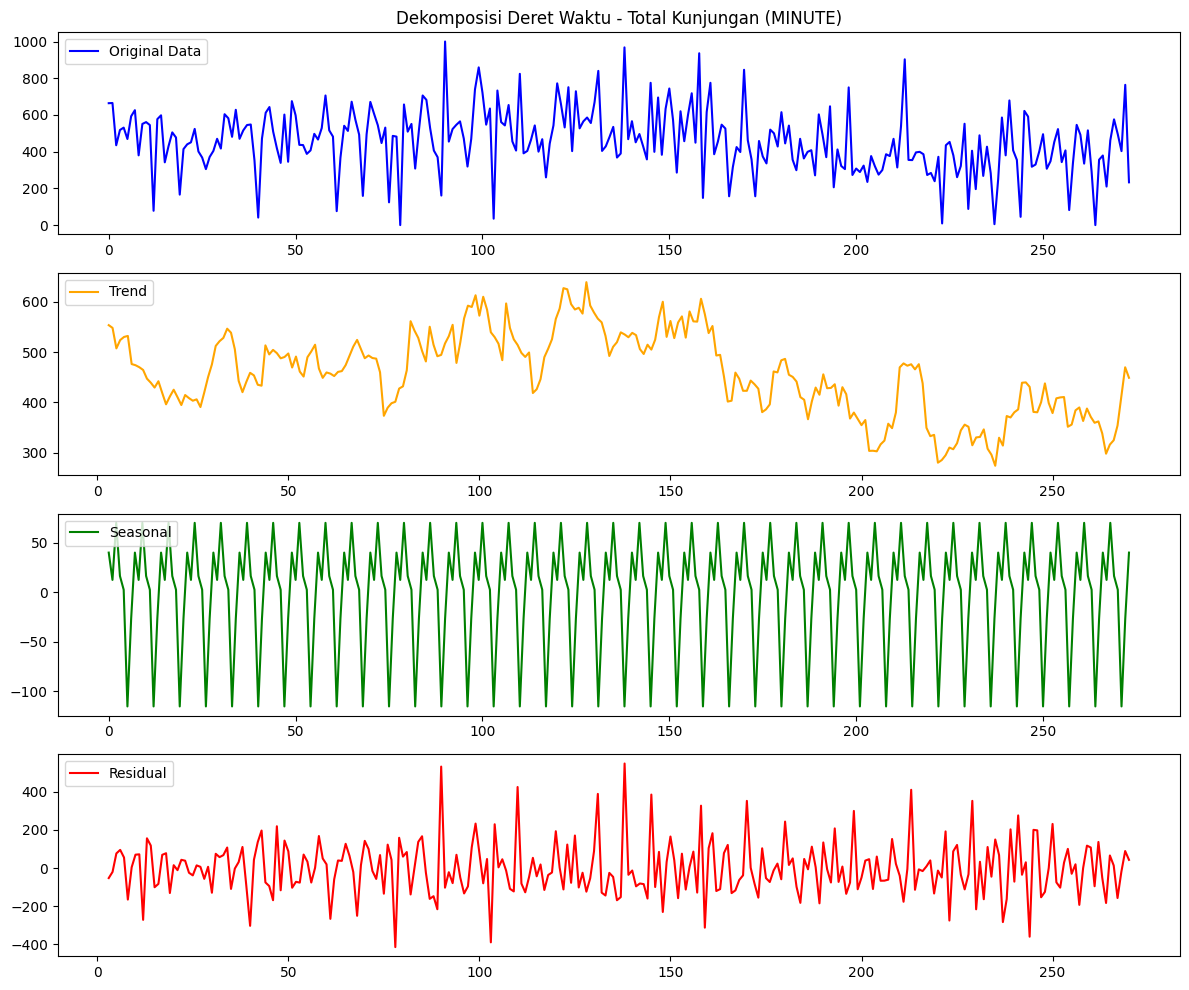

In [7]:
# ===========================================
# DEKOMPOSISI 
# ===========================================

# Pilih kolom untuk visualisasi, misalnya 'Total Kunjungan (MINUTE)'
column_name = 'Total Kunjungan (MINUTE)'

# Data Asli
original_data = grouped_data.set_index('PERIODE DATE')[column_name]

# Melakukan dekomposisi deret waktu
decomposition = seasonal_decompose(grouped_data['Total Kunjungan (MINUTE)'], model='additive', period=7)

# Memisahkan komponen dekomposisi
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Visualisasi dekomposisi
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(grouped_data['Total Kunjungan (MINUTE)'], label='Original Data', color='blue')
plt.legend(loc='upper left')
plt.title('Dekomposisi Deret Waktu - Total Kunjungan (MINUTE)')

plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


Hasil Augmented Dickey-Fuller Test:
ADF Statistic: -3.812883434768411
p-value: 0.0027782171924074766
Critical Values:
   1%: -3.4550813975770827
   5%: -2.8724265892710914
   10%: -2.5725712007462582

Data stasioner terhadap mean (H0 ditolak).
Hasil KPSS Test:
KPSS Statistic: 1.4413282633577837
p-value: 0.01
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739

H0 ditolak: Data tidak stasioner terhadap varians.
Nilai Lambda untuk Transformasi Box-Cox: 0.9663279782877713

Kesimpulan Stasioner Varians:
Standar Deviasi Sebelum Transformasi: 173.83
Standar Deviasi Setelah Transformasi: 141.80

Setelah transformasi Box-Cox, varians data lebih stabil. Data cenderung stasioner terhadap varians.


C:\Users\user\AppData\Local\Temp\ipykernel_19680\2036509797.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss = kpss(grouped_data['Total Kunjungan (MINUTE)'], regression='c')
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_co

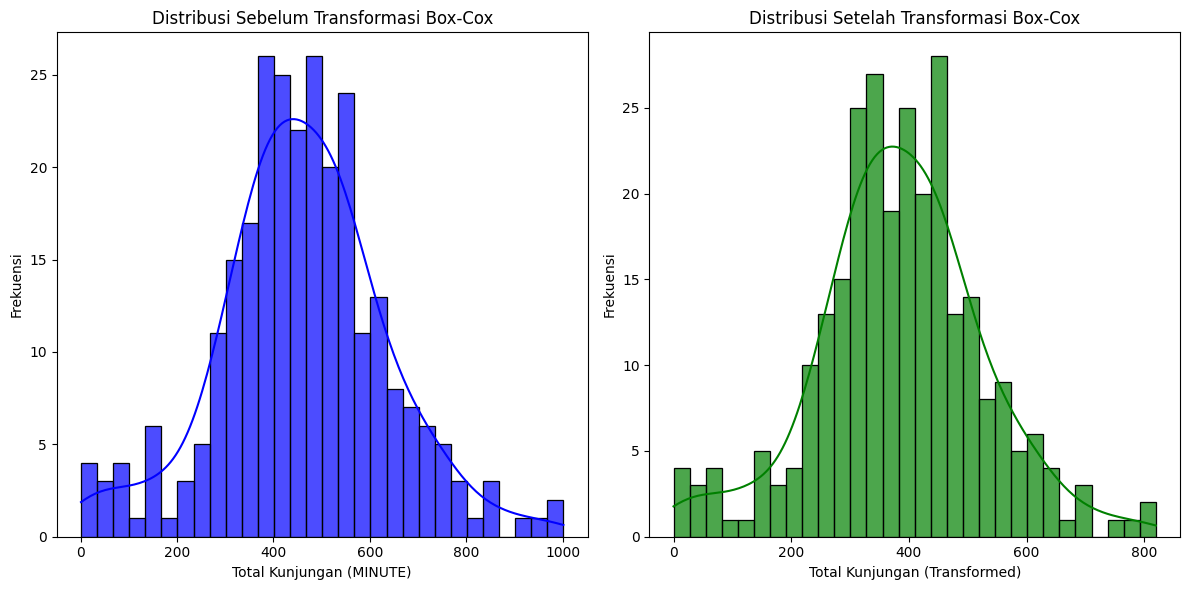

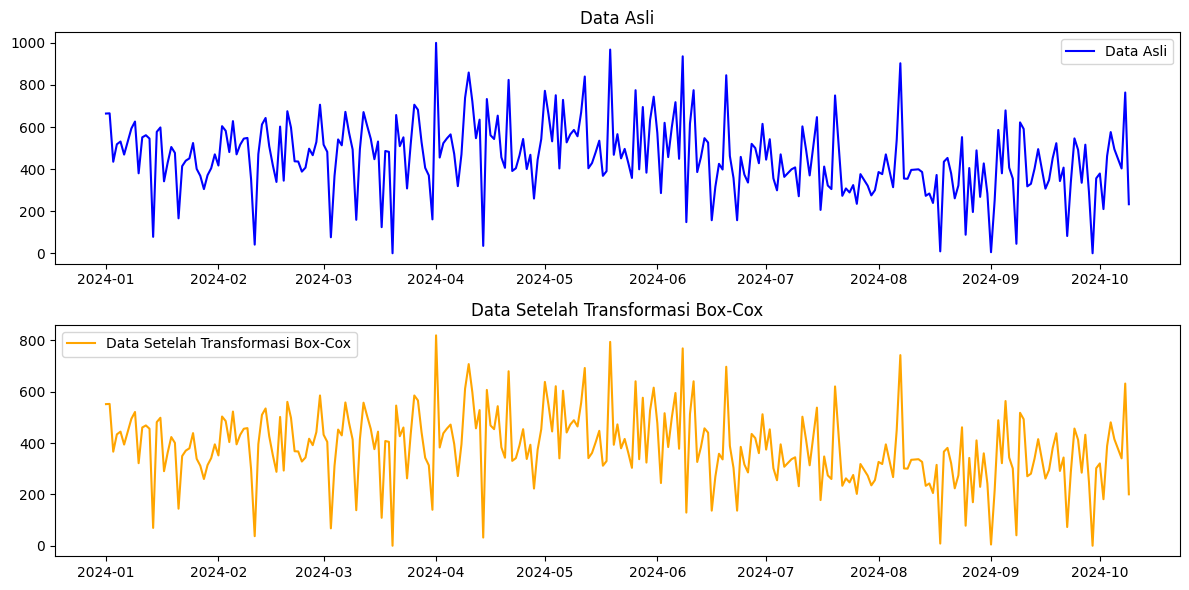

0      551.865651
1      552.669064
2      366.657923
3      434.093755
4      444.621529
          ...    
269    480.998284
270    415.445782
271    340.546922
272    632.015384
273    200.483698
Length: 274, dtype: float64

In [8]:
# ===========================================
# UJI STASIONER DALAM MEAN
# ===========================================


# Menggunakan ADF test untuk memeriksa stasioner mean
result_adf = adfuller(grouped_data['Total Kunjungan (MINUTE)'])

print("Hasil Augmented Dickey-Fuller Test:")
print(f"ADF Statistic: {result_adf[0]}")
print(f"p-value: {result_adf[1]}")
print(f"Critical Values:")
for key, value in result_adf[4].items():
    print(f"   {key}: {value}")

if result_adf[1] < 0.05:
    print("\nData stasioner terhadap mean (H0 ditolak).")
else:
    print("\nData tidak stasioner terhadap mean (H0 gagal ditolak).")

# ===========================================
# UJI STASIONER DALAM VARIANS
# ===========================================
    
# Menggunakan KPSS test untuk memeriksa stasioner terhadap varians
result_kpss = kpss(grouped_data['Total Kunjungan (MINUTE)'], regression='c')

print("Hasil KPSS Test:")
print(f"KPSS Statistic: {result_kpss[0]}")
print(f"p-value: {result_kpss[1]}")
print(f"Critical Values:")
for key, value in result_kpss[3].items():
    print(f"   {key}: {value}")

# Hipotesis Nol (H0): Deret waktu bersifat stasioner
if result_kpss[1] < 0.05:
    print("\nH0 ditolak: Data tidak stasioner terhadap varians.")
else:
    print("\nH0 gagal ditolak: Data stasioner terhadap varians.")

# ===========================================
# TRANSFORMASI BOXCOX
# ===========================================

# Pastikan data memiliki indeks waktu
grouped_data['PERIODE DATE'] = pd.to_datetime(grouped_data['PERIODE DATE'])
time_series_data = grouped_data.set_index('PERIODE DATE')['Total Kunjungan (MINUTE)']

# ===========================================
# BOX-COX TRANSFORMATION
# ===========================================
# Fungsi untuk transformasi Box-Cox
def box_cox_transformation(timeseries):
    """
    Fungsi untuk melakukan transformasi Box-Cox pada deret waktu.
    
    Parameters:
    timeseries: pd.Series - Deret waktu yang akan ditransformasikan
    
    Returns:
    transformed_data: pd.Series - Data yang sudah ditransformasikan
    lambda_ : float - Nilai lambda yang digunakan dalam transformasi Box-Cox
    """
    # Menghindari nilai negatif atau nol, karena Box-Cox hanya bekerja pada data positif
    timeseries = timeseries + 1  # Menambahkan 1 untuk memastikan data positif
    
    # Melakukan transformasi Box-Cox
    transformed_data, lambda_ = stats.boxcox(timeseries.dropna())
    
    # Kembalikan data yang sudah ditransformasi dan nilai lambda
    return pd.Series(transformed_data, index=timeseries.dropna().index), lambda_

# Melakukan transformasi Box-Cox
transformed_data, lambda_ = box_cox_transformation(time_series_data)

# Menampilkan hasil transformasi Box-Cox
print(f"Nilai Lambda untuk Transformasi Box-Cox: {lambda_}")

# ===========================================
# KESIMPULAN STASIONER VARIANS
# ===========================================
# Menghitung standar deviasi sebelum dan sesudah transformasi
std_before = time_series_data.std()
std_after = np.std(transformed_data)

# Membandingkan standar deviasi sebelum dan sesudah transformasi
print("\nKesimpulan Stasioner Varians:")
print(f"Standar Deviasi Sebelum Transformasi: {std_before:.2f}")
print(f"Standar Deviasi Setelah Transformasi: {std_after:.2f}")

if std_after < std_before:
    print("\nSetelah transformasi Box-Cox, varians data lebih stabil. Data cenderung stasioner terhadap varians.")
else:
    print("\nTransformasi Box-Cox tidak berhasil menstabilkan varians. Data mungkin tidak stasioner terhadap varians.")

# ===========================================
# PLOT DISTRIBUSI SEBELUM DAN SESUDAH BOX-COX
# ===========================================
plt.figure(figsize=(12, 6))

# Plot distribusi sebelum transformasi
plt.subplot(1, 2, 1)
sns.histplot(time_series_data + 1, kde=True, bins=30, color='blue', alpha=0.7)  # Data asli dengan tambahan 1
plt.title("Distribusi Sebelum Transformasi Box-Cox")
plt.xlabel("Total Kunjungan (MINUTE)")
plt.ylabel("Frekuensi")

# Plot distribusi setelah transformasi Box-Cox
plt.subplot(1, 2, 2)
sns.histplot(transformed_data, kde=True, bins=30, color='green', alpha=0.7)
plt.title("Distribusi Setelah Transformasi Box-Cox")
plt.xlabel("Total Kunjungan (Transformed)")
plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()

# ===========================================
# PLOT TIME SERIES SEBELUM DAN SESUDAH BOX-COX
# ===========================================
plt.figure(figsize=(12, 6))

# Plot data asli
plt.subplot(2, 1, 1)
plt.plot(time_series_data, label='Data Asli', color='blue')
plt.title('Data Asli')
plt.legend()

# Plot data setelah transformasi Box-Cox
plt.subplot(2, 1, 2)
plt.plot(transformed_data, label='Data Setelah Transformasi Box-Cox', color='orange')
plt.title('Data Setelah Transformasi Box-Cox')
plt.legend()

plt.tight_layout()
plt.show()

# Mengembalikan data hasil transformasi Box-Cox (tanpa periode tanggal)
transformed_data.reset_index(drop=True, inplace=True)
transformed_data


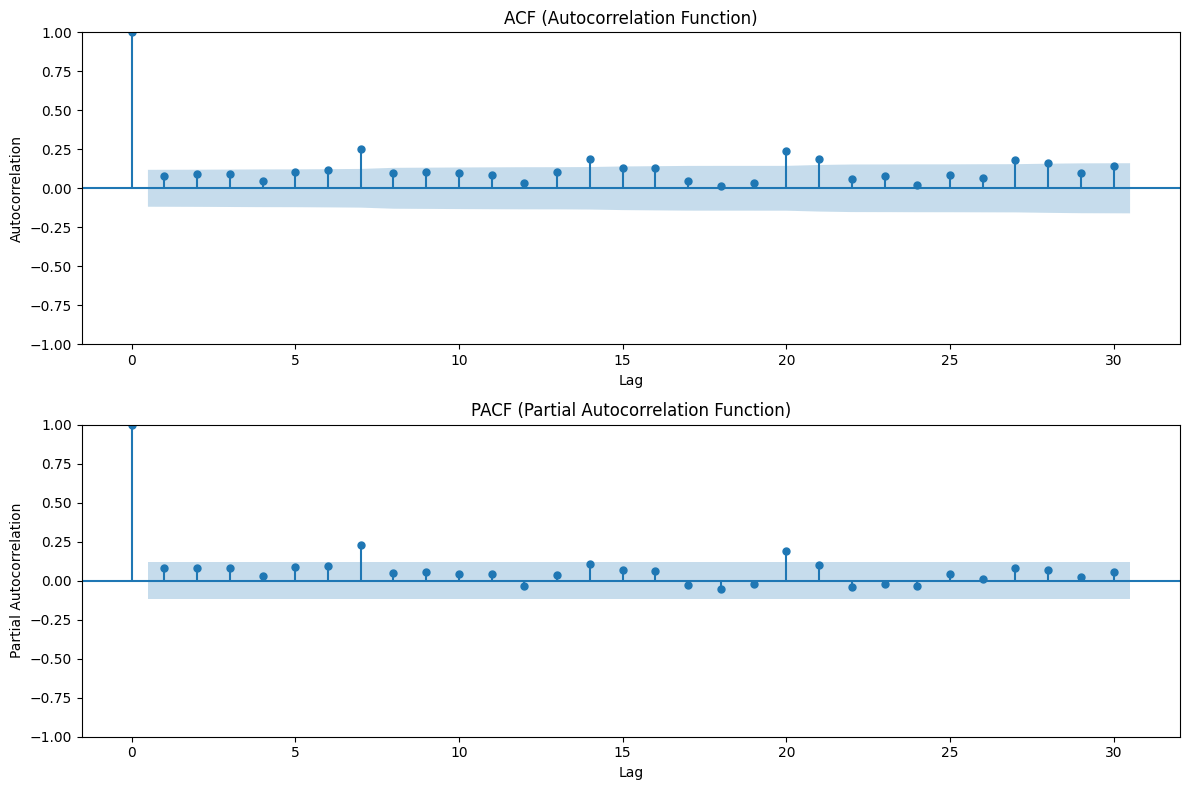

C:\Users\user\AppData\Local\Temp\ipykernel_19680\1364866186.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_data_diff_1['Differenced_2'] = grouped_data_diff_1['Differenced_1'].diff()


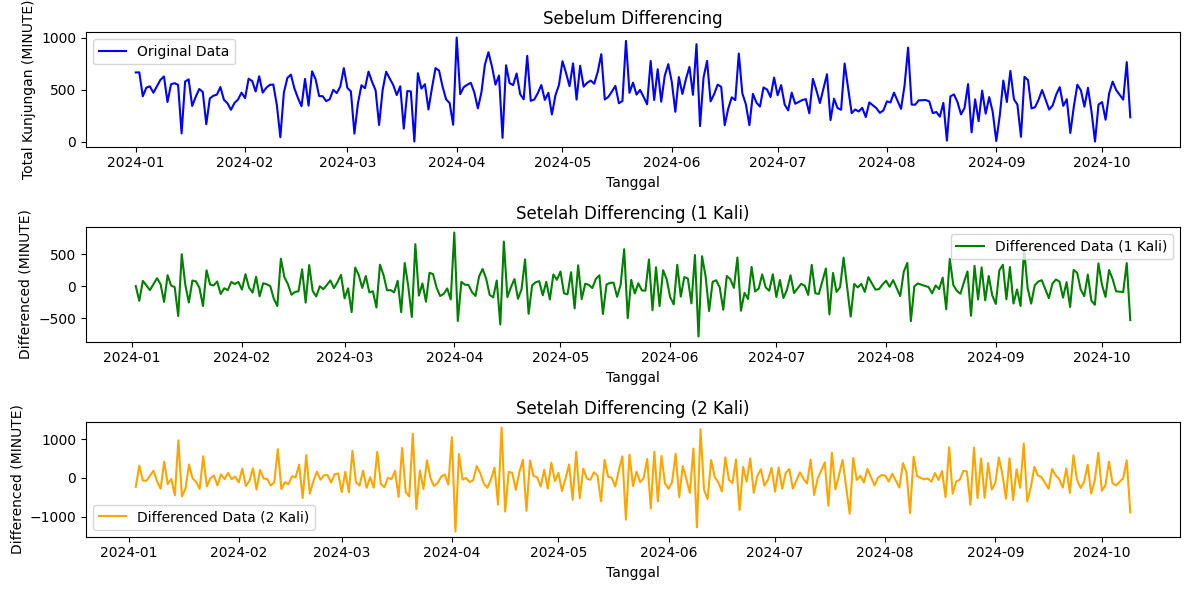

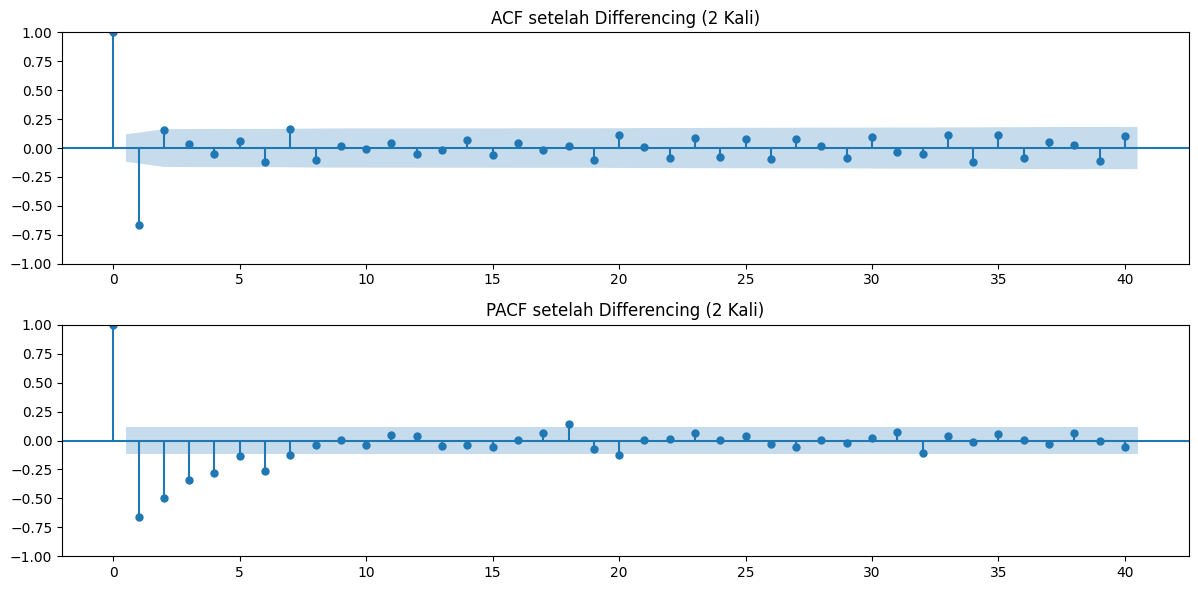

In [9]:
# ===========================================
# PLOT ACF DAN PACF
# ===========================================

plt.figure(figsize=(12, 8))

# Plot ACF
plt.subplot(2, 1, 1)
plot_acf(grouped_data['Total Kunjungan (MINUTE)'], lags=30, ax=plt.gca(), title="ACF (Autocorrelation Function)")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")

# Plot PACF
plt.subplot(2, 1, 2)
plot_pacf(grouped_data['Total Kunjungan (MINUTE)'], lags=30, ax=plt.gca(), title="PACF (Partial Autocorrelation Function)")
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")

plt.tight_layout()
plt.show()

# ===========================================
# DIFFERENCING 2 KALI
# ===========================================

# Melakukan differencing pertama pada data 'Total Kunjungan (MINUTE)'
grouped_data['Differenced_1'] = grouped_data['Total Kunjungan (MINUTE)'].diff()

# Menghapus baris pertama yang memiliki nilai NaN akibat differencing pertama
grouped_data_diff_1 = grouped_data.dropna(subset=['Differenced_1'])

# Melakukan differencing kedua pada data yang sudah dideferensiasi pertama
grouped_data_diff_1['Differenced_2'] = grouped_data_diff_1['Differenced_1'].diff()

# Menghapus baris pertama yang memiliki nilai NaN akibat differencing kedua
grouped_data_diff_2 = grouped_data_diff_1.dropna(subset=['Differenced_2'])

# ===========================================
# VISUALISASI HASIL DIFFERENCING 2 KALI
# ===========================================

plt.figure(figsize=(12, 6))

# Sebelum differencing
plt.subplot(3, 1, 1)
plt.plot(grouped_data['PERIODE DATE'], grouped_data['Total Kunjungan (MINUTE)'], label='Original Data', color='blue')
plt.title("Sebelum Differencing")
plt.xlabel("Tanggal")
plt.ylabel("Total Kunjungan (MINUTE)")
plt.legend()

# Setelah differencing pertama
plt.subplot(3, 1, 2)
plt.plot(grouped_data_diff_1['PERIODE DATE'], grouped_data_diff_1['Differenced_1'], label='Differenced Data (1 Kali)', color='green')
plt.title("Setelah Differencing (1 Kali)")
plt.xlabel("Tanggal")
plt.ylabel("Differenced (MINUTE)")
plt.legend()

# Setelah differencing kedua
plt.subplot(3, 1, 3)
plt.plot(grouped_data_diff_2['PERIODE DATE'], grouped_data_diff_2['Differenced_2'], label='Differenced Data (2 Kali)', color='orange')
plt.title("Setelah Differencing (2 Kali)")
plt.xlabel("Tanggal")
plt.ylabel("Differenced (MINUTE)")
plt.legend()

plt.tight_layout()
plt.show()

# ===========================================
# PLOT ACF dan PACF setelah Differencing 2 Kali
# ===========================================

plt.figure(figsize=(12, 6))

# Plot ACF (Autocorrelation Function) setelah differencing 2 kali
plt.subplot(2, 1, 1)
plot_acf(grouped_data_diff_2['Differenced_2'], lags=40, ax=plt.gca())
plt.title("ACF setelah Differencing (2 Kali)")

# Plot PACF (Partial Autocorrelation Function) setelah differencing 2 kali
plt.subplot(2, 1, 2)
plot_pacf(grouped_data_diff_2['Differenced_2'], lags=40, ax=plt.gca())
plt.title("PACF setelah Differencing (2 Kali)")

plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(6, 2, 1) - AIC: 3592.902144041197

Model terbaik adalah ARIMA(6, 2, 1) dengan AIC: 3592.902144041197


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



Ringkasan Model Terbaik:
                                  SARIMAX Results                                   
Dep. Variable:     Total Kunjungan (MINUTE)   No. Observations:                  274
Model:                       ARIMA(6, 2, 1)   Log Likelihood               -1788.451
Date:                      Fri, 24 Jan 2025   AIC                           3592.902
Time:                              20:54:40   BIC                           3621.749
Sample:                                   0   HQIC                          3604.483
                                      - 274                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8966      0.061    -14.769      0.000      -1.016      -0.778
ar.L2         -0.7797      0.083     -9.387      0.000   

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


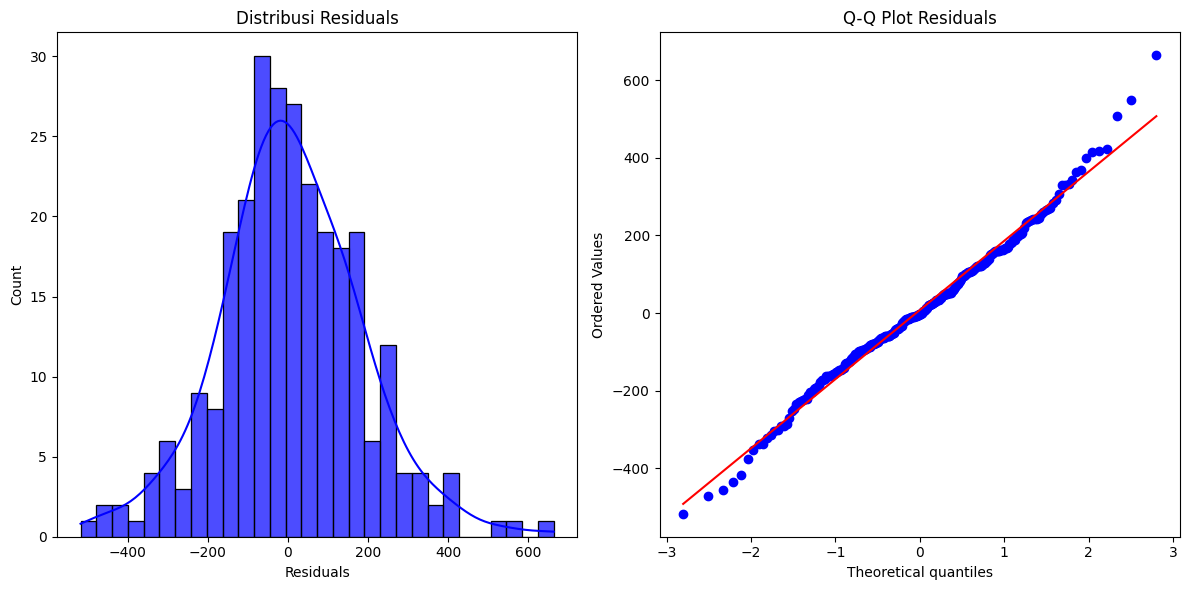

In [10]:
# ===========================================
# ESTIMASI PARAMETER ARIMA
# ===========================================

# Parameter berdasarkan ACF dan PACF
p_values = [6]  # Berdasarkan PACF
q_values = [1]  # Berdasarkan ACF
d_value = 2  

# Data yang akan digunakan untuk model (Total Kunjungan)
time_series = grouped_data['Total Kunjungan (MINUTE)']

# Iterasi untuk mencoba kombinasi parameter
best_model = p_values,q_values,d_value
best_aic = float('inf')

for p in p_values:
    for q in q_values:
        try:
            # Estimasi model ARIMA
            model = ARIMA(time_series, order=(p, d_value, q))
            results = model.fit()

            print(f"ARIMA({p}, {d_value}, {q}) - AIC: {results.aic}")
            
            # Simpan model terbaik berdasarkan AIC
            if results.aic < best_aic:
                best_aic = results.aic
                best_model = (p, d_value, q)
        except Exception as e:
            print(f"Model ARIMA({p}, {d_value}, {q}) gagal. Error: {e}")

# ===========================================
# HASIL MODEL TERBAIK
# ===========================================

if best_model:
    print(f"\nModel terbaik adalah ARIMA{best_model} dengan AIC: {best_aic}")
    # Latih kembali model terbaik
    final_model = ARIMA(time_series, order=best_model)
    final_results = final_model.fit()

    # Menampilkan ringkasan hasil model terbaik
    print("\nRingkasan Model Terbaik:")
    print(final_results.summary())

    # Plot residual untuk mengevaluasi model
    residuals = final_results.resid
    plt.figure(figsize=(12, 6))
    
    # Histogram Residuals
    plt.subplot(1, 2, 1)
    sns.histplot(residuals, kde=True, bins=30, color='blue', alpha=0.7)
    plt.title("Distribusi Residuals")
    plt.xlabel("Residuals")
    
    # Q-Q Plot Residuals
    plt.subplot(1, 2, 2)
    probplot(residuals, dist="norm", plot=plt)
    plt.title("Q-Q Plot Residuals")

    plt.tight_layout()
    plt.show()

else:
    print("Tidak ada model ARIMA yang berhasil diestimasi.")



Hasil Uji Ljung-Box (Autocorrelation):
     lb_stat  lb_pvalue
10  7.224382   0.704106

Hasil Uji Normalitas (Shapiro-Wilk Test):
Statistik Uji: 0.9903039932250977, p-value: 0.06577419489622116


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


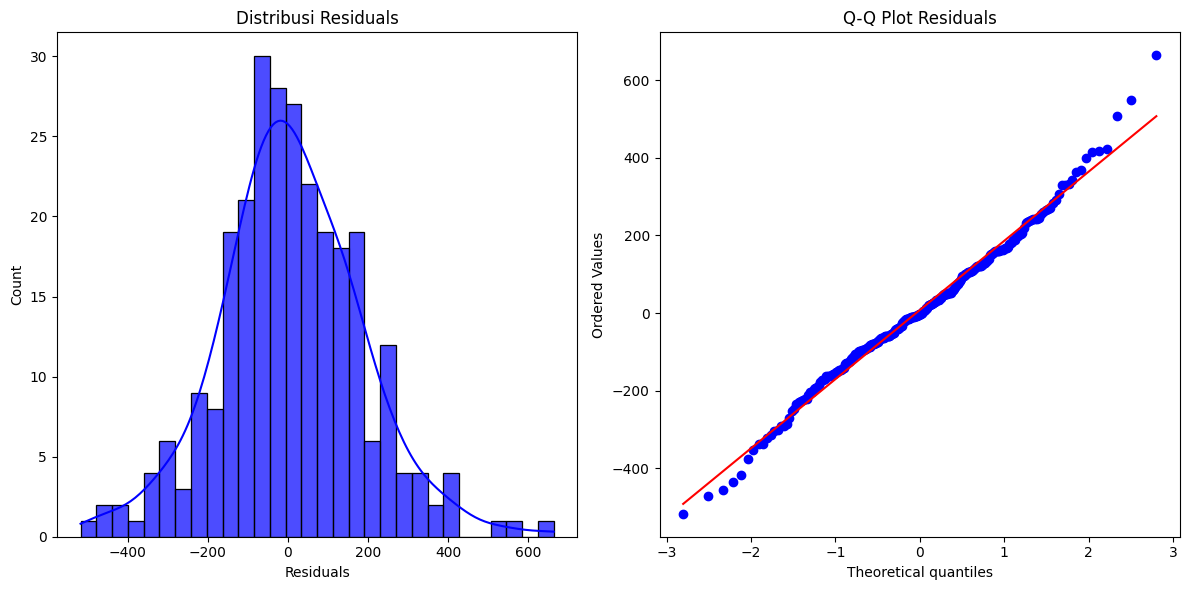


Uji Ljung-Box: Tidak ada autocorrelation yang signifikan pada residuals. P-value: 0.7041056914966717

Uji Normalitas (Shapiro-Wilk): Residuals terdistribusi normal. P-value: 0.06577419489622116

Kesimpulan: Model ARIMA memenuhi asumsi dasar yaitu residuals tidak menunjukkan autocorrelation dan terdistribusi normal.


In [11]:
# ===========================================
# UJI ASUMSI RESIDUAL
# ===========================================

# Pastikan residuals diambil dari model terbaik yang sudah dipelajari sebelumnya
residuals = final_results.resid

# 1. Uji Ljung-Box untuk menguji apakah residual memiliki autocorrelation
ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("\nHasil Uji Ljung-Box (Autocorrelation):")
print(ljung_box_test)

# Ambil p-value dari hasil uji Ljung-Box untuk lag 10
ljung_box_p_value = ljung_box_test['lb_pvalue'].iloc[0]  # Mengakses p-value untuk lag 10

# 2. Uji Normalitas dengan Shapiro-Wilk Test
shapiro_stat, shapiro_p_value = shapiro(residuals)
print("\nHasil Uji Normalitas (Shapiro-Wilk Test):")
print(f"Statistik Uji: {shapiro_stat}, p-value: {shapiro_p_value}")

# Plot residual untuk mengevaluasi model
plt.figure(figsize=(12, 6))

# Histogram Residuals
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, bins=30, color='blue', alpha=0.7)
plt.title("Distribusi Residuals")
plt.xlabel("Residuals")

# Q-Q Plot Residuals
plt.subplot(1, 2, 2)
probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot Residuals")

plt.tight_layout()
plt.show()

# ===========================================
# KESIMPULAN UJI ASUMSI RESIDUAL
# ===========================================

# 1. Kesimpulan Uji Ljung-Box (Autocorrelation)
if ljung_box_p_value > 0.05:
    print("\nUji Ljung-Box: Tidak ada autocorrelation yang signifikan pada residuals. P-value:", ljung_box_p_value)
else:
    print("\nUji Ljung-Box: Terdapat autocorrelation yang signifikan pada residuals. P-value:", ljung_box_p_value)

# 2. Kesimpulan Uji Normalitas (Shapiro-Wilk Test)
if shapiro_p_value > 0.05:
    print("\nUji Normalitas (Shapiro-Wilk): Residuals terdistribusi normal. P-value:", shapiro_p_value)
else:
    print("\nUji Normalitas (Shapiro-Wilk): Residuals tidak terdistribusi normal. P-value:", shapiro_p_value)

# 3. Kesimpulan Visualisasi
# Histogram dan Q-Q plot digunakan untuk mengevaluasi visual residuals
if shapiro_p_value > 0.05 and ljung_box_p_value > 0.05:
    print("\nKesimpulan: Model ARIMA memenuhi asumsi dasar yaitu residuals tidak menunjukkan autocorrelation dan terdistribusi normal.")
else:
    print("\nKesimpulan: Model ARIMA perlu dievaluasi lebih lanjut karena asumsi dasar tidak sepenuhnya terpenuhi.")


In [12]:
# =======================================
# Persiapan Data
# =======================================
# Menggunakan data setelah differencing 2 kali
data_diff_2 = grouped_data_diff_2[['PERIODE DATE', 'Differenced_2']]

# Menentukan 'PERIODE DATE' sebagai indeks
data_diff_2['PERIODE DATE'] = pd.to_datetime(data_diff_2['PERIODE DATE'])  # Pastikan kolom 'PERIODE DATE' adalah datetime
data_diff_2.set_index('PERIODE DATE', inplace=True)

# Membagi data menjadi pelatihan dan pengujian (80% pelatihan, 20% pengujian)
train_size = int(len(data_diff_2) * 0.8)
y_train, y_test = data_diff_2['Differenced_2'][:train_size], data_diff_2['Differenced_2'][train_size:]

# =======================================
# Melatih Model ARIMA(6, 2, 1)
# =======================================
model = ARIMA(y_train, order=(6, 2, 1))
model_fit = model.fit()

# =======================================
# Prediksi dan Evaluasi Model
# =======================================
# Prediksi menggunakan model yang sudah dilatih
pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False)

# Menghitung RMSE dan MAE
rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_absolute_error(y_test, pred)

# =======================================
# Menghitung MAPE (menghindari pembagian dengan 0)
# =======================================
# Menangani nilai Actual = 0 untuk menghindari MAPE = infinity
combined = pd.DataFrame({'Actual': y_test, 'Predicted': pred})

# Menghindari pembagian dengan 0 untuk MAPE
combined = combined[combined['Actual'] != 0]  # Menghapus baris dengan nilai Actual = 0

# Menghitung MAPE hanya jika data masih ada
if not combined.empty:
    mape = np.mean(np.abs((combined['Actual'] - combined['Predicted']) / combined['Actual'])) * 100
    print(f"Model ARIMA(6, 2, 1):")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  MAPE: {mape:.2f}%\n")
else:
    print("Tidak ada data yang valid untuk perhitungan MAPE (nilai Actual = 0 ditemukan).")


C:\Users\user\AppData\Local\Temp\ipykernel_19680\845394592.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_diff_2['PERIODE DATE'] = pd.to_datetime(data_diff_2['PERIODE DATE'])  # Pastikan kolom 'PERIODE DATE' adalah datetime
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:47

Model ARIMA(6, 2, 1):
  RMSE: 392.95418668844167
  MAE: 315.50476560754265
  MAPE: nan%



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [13]:

# =======================================
# Persiapan Data
# =======================================
# Menggunakan data awal dari 'grouped_data'
data = grouped_data[['PERIODE DATE', 'Total Kunjungan (MINUTE)']]  

# Menentukan 'PERIODE DATE' sebagai indeks
data['PERIODE DATE'] = pd.to_datetime(data['PERIODE DATE'])  # Pastikan kolom 'PERIODE DATE' adalah datetime
data.set_index('PERIODE DATE', inplace=True)

# Membagi data menjadi pelatihan dan pengujian (80% pelatihan, 20% pengujian)
train_size = int(len(data) * 0.8)
y_train, y_test = data['Total Kunjungan (MINUTE)'][:train_size], data['Total Kunjungan (MINUTE)'][train_size:]

# =======================================
# Melatih Model ARIMA(6, 2, 1) pada Data Asli
# =======================================
model = ARIMA(y_train, order=(6, 2, 1))
model_fit = model.fit()

# =======================================
# Prediksi 20 Hari Ke Depan
# =======================================
pred_future = model_fit.predict(start=len(y_train), end=len(y_train) + 19, dynamic=False)

# =======================================
# Membuat Tabel Hasil Prediksi
# =======================================
# Membuat tanggal prediksi 20 hari ke depan
future_dates = pd.date_range(start=y_test.index[-1] + pd.Timedelta(days=1), periods=20, freq='D')

# Membuat DataFrame untuk menampilkan hasil prediksi
pred_df = pd.DataFrame({
    'Tanggal Prediksi': future_dates,
    'Prediksi Total Kunjungan (MINUTE)': pred_future
})

# Menampilkan tabel
display(pred_df)


C:\Users\user\AppData\Local\Temp\ipykernel_19680\1204530588.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PERIODE DATE'] = pd.to_datetime(data['PERIODE DATE'])  # Pastikan kolom 'PERIODE DATE' adalah datetime
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarni

,Tanggal Prediksi,Prediksi Total Kunjungan (MINUTE)
219,2024-10-10,497.572319
220,2024-10-11,539.057898
221,2024-10-12,400.864929
222,2024-10-13,412.701807
223,2024-10-14,418.038390
224,2024-10-15,419.771158
225,2024-10-16,436.581762
226,2024-10-17,454.783585
227,2024-10-18,453.795988
228,2024-10-19,420.282617


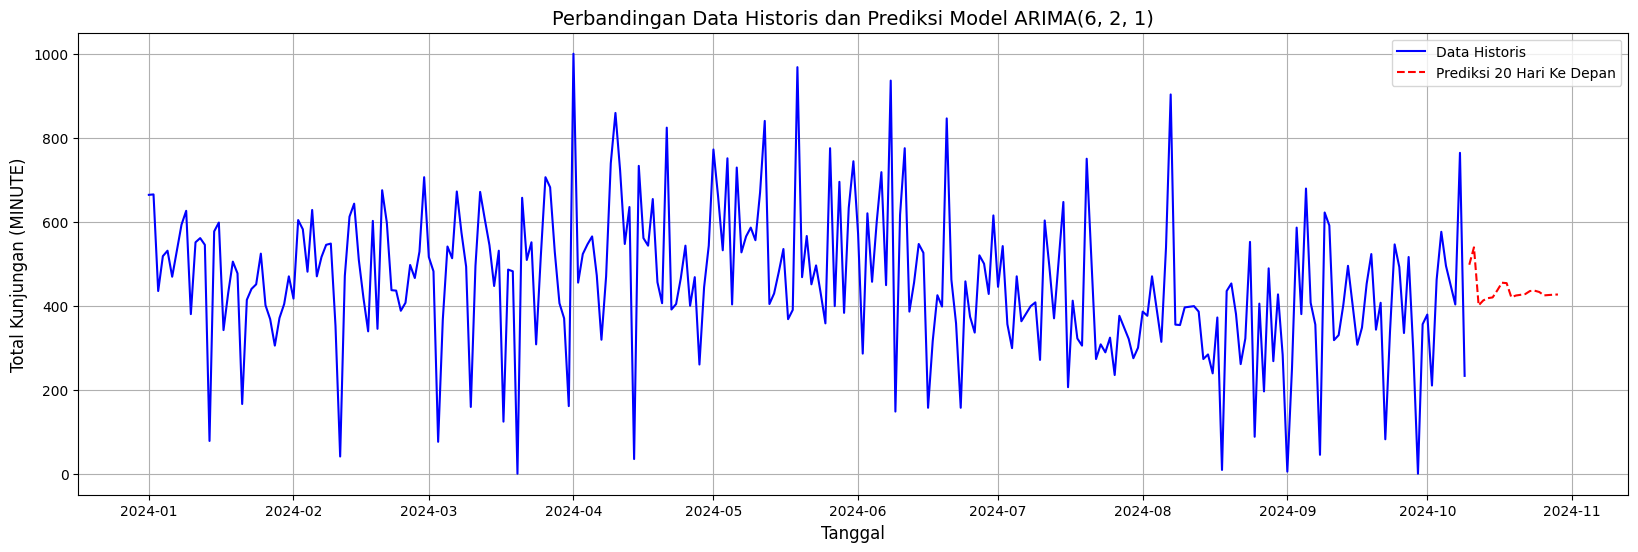

In [14]:
# =======================================
# Visualisasi Data Asli dan Prediksi
# =======================================

# Membuat plot untuk data historis (data pelatihan + data pengujian)
plt.figure(figsize=(20, 6))
plt.plot(data.index, data['Total Kunjungan (MINUTE)'], label='Data Historis', color='blue')

# Menambahkan prediksi model ARIMA
plt.plot(future_dates, pred_future, label='Prediksi 20 Hari Ke Depan', color='red', linestyle='--')

# Memberikan judul dan label
plt.title('Perbandingan Data Historis dan Prediksi Model ARIMA(6, 2, 1)', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Total Kunjungan (MINUTE)', fontsize=12)

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.grid(True)
plt.show()


In [15]:
# =======================================
# Persiapan Data
# =======================================
# Menggunakan data setelah differencing 2 kali
data_diff_2 = grouped_data_diff_2[['PERIODE DATE', 'Differenced_2']]

# Menentukan 'PERIODE DATE' sebagai indeks
data_diff_2['PERIODE DATE'] = pd.to_datetime(data_diff_2['PERIODE DATE'])  # Pastikan kolom 'PERIODE DATE' adalah datetime
data_diff_2.set_index('PERIODE DATE', inplace=True)

# Membagi data menjadi pelatihan dan pengujian (80% pelatihan, 20% pengujian)
train_size = int(len(data_diff_2) * 0.8)
y_train, y_test = data_diff_2['Differenced_2'][:train_size], data_diff_2['Differenced_2'][train_size:]

# =======================================
# Melatih Model ARIMA(6, 2, 1)
# =======================================
model = ARIMA(y_train, order=(6, 2, 1))
model_fit = model.fit()

# =======================================
# Prediksi dan Evaluasi Model
# =======================================
# Prediksi menggunakan model yang sudah dilatih
pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False)

# Menghitung RMSE dan MAE
rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_absolute_error(y_test, pred)

# =======================================
# Menghitung MAPE (menghindari pembagian dengan 0)
# =======================================
# Menangani nilai Actual = 0 untuk menghindari MAPE = infinity
combined = pd.DataFrame({'Actual': y_test, 'Predicted': pred})

# Menghindari pembagian dengan 0 untuk MAPE
combined = combined[combined['Actual'] != 0]  # Menghapus baris dengan nilai Actual = 0

# Menghitung MAPE hanya jika data masih ada
if not combined.empty:
    mape = np.mean(np.abs((combined['Actual'] - combined['Predicted']) / combined['Actual'])) * 100
    print(f"Model ARIMA(6, 2, 1):")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  MAPE: {mape:.2f}%\n")
else:
    print("Tidak ada data yang valid untuk perhitungan MAPE (nilai Actual = 0 ditemukan).")


C:\Users\user\AppData\Local\Temp\ipykernel_19680\845394592.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_diff_2['PERIODE DATE'] = pd.to_datetime(data_diff_2['PERIODE DATE'])  # Pastikan kolom 'PERIODE DATE' adalah datetime
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:47

Model ARIMA(6, 2, 1):
  RMSE: 392.95418668844167
  MAE: 315.50476560754265
  MAPE: nan%



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [16]:
# Menampilkan data aktual
print("Data Aktual (y_test):")
print(y_test)


Data Aktual (y_test):
PERIODE DATE
2024-08-14   -100.0
2024-08-15    124.0
2024-08-16    -56.0
2024-08-17    178.0
2024-08-18   -496.0
2024-08-19    789.0
2024-08-20   -408.0
2024-08-21    -91.0
2024-08-22    -46.0
2024-08-23    180.0
2024-08-24    169.0
2024-08-25   -694.0
2024-08-26    781.0
2024-08-27   -526.0
2024-08-28    502.0
2024-08-29   -514.0
2024-08-30    380.0
2024-08-31   -303.0
2024-09-01   -134.0
2024-09-02    524.0
2024-09-03     89.0
2024-09-04   -541.0
2024-09-05    505.0
2024-09-06   -571.0
2024-09-07    220.0
2024-09-08   -258.0
2024-09-09    887.0
2024-09-10   -608.0
2024-09-11   -242.0
2024-09-12    285.0
2024-09-13     60.0
2024-09-14     21.0
2024-09-16   -281.0
2024-09-17    229.0
2024-09-18     63.0
2024-09-19    -33.0
2024-09-20   -251.0
2024-09-21    244.0
2024-09-22   -389.0
2024-09-23    580.0
2024-09-24    -46.0
2024-09-25   -263.0
2024-09-26   -103.0
2024-09-27    338.0
2024-09-28   -406.0
2024-09-29    -66.0
2024-09-30    647.0
2024-10-01   -333.0
2024-

In [17]:
# Menampilkan data prediksi
print("Data Predicted (Prediksi):")
print(pred)


Data Predicted (Prediksi):
217   -117.066297
218     61.178276
219      3.022158
220    111.548205
221   -175.972530
222     46.020771
223     26.901824
224    -23.513618
225     25.802036
226    -48.049090
227     14.580609
228    -14.631202
229     23.610821
230    -25.792792
231     -9.488599
232      7.674177
233    -14.904541
234      7.372608
235    -15.412134
236     -2.004389
237     -7.458266
238     -1.940669
239     -5.362538
240     -9.617080
241     -1.827659
242     -8.966498
243     -2.953215
244     -7.472903
245     -6.149637
246     -6.027549
247     -6.553867
248     -5.401210
249     -7.741918
250     -5.676777
251     -7.336337
252     -6.379463
253     -6.852606
254     -7.241304
255     -6.825884
256     -7.439744
257     -6.937983
258     -7.625394
259     -7.322536
260     -7.622048
261     -7.674505
262     -7.657000
263     -7.964030
264     -7.858517
265     -8.125594
266     -8.079333
267     -8.270690
268     -8.336818
269     -8.420175
270     -8.562600
2

In [18]:
# Menampilkan jumlah total data yang digunakan di y_test
jumlah_data_aktual = len(y_test)
print(f"Jumlah total data aktual (y_test): {jumlah_data_aktual}")
# Menampilkan jumlah total data yang digunakan di prediksi
jumlah_data_prediksi = len(pred)
print(f"Jumlah total data prediksi (pred): {jumlah_data_prediksi}")



Jumlah total data aktual (y_test): 55
Jumlah total data prediksi (pred): 55


In [19]:
print("Cek nilai NaN atau nol di y_test:")
print(y_test.isnull().sum(), (y_test == 0).sum())

print("Cek nilai NaN atau nol di pred:")
print(pred.isnull().sum(), (pred == 0).sum())


Cek nilai NaN atau nol di y_test:
0 0
Cek nilai NaN atau nol di pred:
0 0


In [20]:
y_test = y_test.fillna(y_test.mean())
pred = pred.fillna(pred.mean())


In [21]:
print("Indeks y_test:", y_test.index)
print("Indeks pred:", pred.index)


Indeks y_test: DatetimeIndex(['2024-08-14', '2024-08-15', '2024-08-16', '2024-08-17',
               '2024-08-18', '2024-08-19', '2024-08-20', '2024-08-21',
               '2024-08-22', '2024-08-23', '2024-08-24', '2024-08-25',
               '2024-08-26', '2024-08-27', '2024-08-28', '2024-08-29',
               '2024-08-30', '2024-08-31', '2024-09-01', '2024-09-02',
               '2024-09-03', '2024-09-04', '2024-09-05', '2024-09-06',
               '2024-09-07', '2024-09-08', '2024-09-09', '2024-09-10',
               '2024-09-11', '2024-09-12', '2024-09-13', '2024-09-14',
               '2024-09-16', '2024-09-17', '2024-09-18', '2024-09-19',
               '2024-09-20', '2024-09-21', '2024-09-22', '2024-09-23',
               '2024-09-24', '2024-09-25', '2024-09-26', '2024-09-27',
               '2024-09-28', '2024-09-29', '2024-09-30', '2024-10-01',
               '2024-10-02', '2024-10-03', '2024-10-04', '2024-10-05',
               '2024-10-07', '2024-10-08', '2024-10-09'],
    

In [22]:
pred.index = y_test.index  # Samakan indeks pred dengan y_test


In [23]:
combined = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
combined = combined[combined['Actual'] != 0]

if not combined.empty:
    mape = np.mean(np.abs((combined['Actual'] - combined['Predicted']) / combined['Actual'])) * 100
    print(f"MAPE: {mape:.2f}%")
else:
    print("Tidak ada data yang valid untuk perhitungan MAPE.")


MAPE: 94.89%


# ANALISIS SEGEMENTASI PELANGGAN

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist


In [28]:
# ===========================================
# IMPORT DATA
# ===========================================

# Membaca data dari file CSV
file_path = "C:/Users/user/Downloads/MY MAGANG 5/DATA TELKOMSEL/EVENTS/output EVENTS alls.csv"

# Pastikan untuk menyesuaikan delimiter jika berbeda
data = pd.read_csv(file_path, sep=';')

# Menghapus kolom 'OMSET TOTAL.1' langsung
data.drop(columns=['OMSET TOTAL.1'], inplace=True)
display(data)

# Mengisi nilai yang hilang dengan 0
data.fillna(0, inplace=True)

# Menghapus data duplikat
data.drop_duplicates(inplace=True)

# Pastikan kolom numerik dalam format yang sesuai (jika diperlukan)
num_cols = ['DS RATIO (%)', 'ACTUAL CALL (%)']  # Sesuaikan dengan dataset
for col in num_cols:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0)

# Membulatkan nilai kolom persentase dan mengubah tipe datanya menjadi integer
if 'DS RATIO (%)' in data.columns:
    data['DS RATIO (%)'] = data['DS RATIO (%)'].round().astype(int)
if 'ACTUAL CALL (%)' in data.columns:
    data['ACTUAL CALL (%)'] = data['ACTUAL CALL (%)'].round().astype(int)
    
# Membuat kolom baru untuk menghitung rasio pelanggan aktif
data['ACTIVE RATIO'] = data['DS ACTIVE'] / data['DS TOTAL']

data

,AREA,REGIONAL,BRANCH,CLUSTER,CITY,DS TOTAL,DS ACTIVE,DS RATIO (%),OMSET TRX DIGITAL,OMSET TOTAL,...,PLAN POI,ACTUAL POI,PLAN EVENT,ACTUAL EVENT,ACTUAL CALL (%),SALES,OTA,SALES ORBIT,VF,TRX DIGITAL
0,JAWA - BALI - NUSRA,BALI NUSRA,DENPASAR,BALI BARAT,BULELENG,42,3,7.1,39,11043601,...,49,37,72,50,69.0,0,0,0,0,29
1,JAWA - BALI - NUSRA,BALI NUSRA,DENPASAR,BALI BARAT,JEMBRANA,23,3,13.0,39,14135322,...,48,43,75,56,75.0,0,0,0,0,30
2,JAWA - BALI - NUSRA,BALI NUSRA,DENPASAR,BALI BARAT,TABANAN,20,3,15.0,37,8446941,...,50,46,53,48,91.0,5,0,0,0,36
3,JAWA - BALI - NUSRA,BALI NUSRA,DENPASAR,BALI TENGAH,BADUNG,42,6,14.3,92,24862947,...,116,77,156,100,64.0,59,0,0,125,89
4,JAWA - BALI - NUSRA,BALI NUSRA,DENPASAR,BALI TENGAH,KOTA DENPASAR,107,6,5.6,84,32561574,...,32,29,152,105,69.0,6,0,0,38,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,JAWA - BALI - NUSRA,JATIM,SURABAYA,KOTA SURABAYA,KOTA SURABAYA,197,13,6.6,18,9563982,...,45,43,51,49,96.0,24,0,0,0,18
1067,JAWA - BALI - NUSRA,JATIM,SURABAYA,MADURA,BANGKALAN,36,4,11.1,0,3282292,...,1,1,4,4,100.0,0,0,0,0,0
1068,JAWA - BALI - NUSRA,JATIM,SURABAYA,MADURA,PAMEKASAN,32,4,12.5,0,3308591,...,1,1,4,4,100.0,11,0,0,0,0
1069,JAWA - BALI - NUSRA,JATIM,SURABAYA,MADURA,SAMPANG,24,4,16.7,0,1364900,...,2,1,5,4,80.0,37,0,0,0,0


,AREA,REGIONAL,BRANCH,CLUSTER,CITY,DS TOTAL,DS ACTIVE,DS RATIO (%),OMSET TRX DIGITAL,OMSET TOTAL,...,ACTUAL POI,PLAN EVENT,ACTUAL EVENT,ACTUAL CALL (%),SALES,OTA,SALES ORBIT,VF,TRX DIGITAL,ACTIVE RATIO
0,JAWA - BALI - NUSRA,BALI NUSRA,DENPASAR,BALI BARAT,BULELENG,42,3,7,39,11043601,...,37,72,50,69,0,0,0,0,29,0.071429
1,JAWA - BALI - NUSRA,BALI NUSRA,DENPASAR,BALI BARAT,JEMBRANA,23,3,13,39,14135322,...,43,75,56,75,0,0,0,0,30,0.130435
2,JAWA - BALI - NUSRA,BALI NUSRA,DENPASAR,BALI BARAT,TABANAN,20,3,15,37,8446941,...,46,53,48,91,5,0,0,0,36,0.150000
3,JAWA - BALI - NUSRA,BALI NUSRA,DENPASAR,BALI TENGAH,BADUNG,42,6,14,92,24862947,...,77,156,100,64,59,0,0,125,89,0.142857
4,JAWA - BALI - NUSRA,BALI NUSRA,DENPASAR,BALI TENGAH,KOTA DENPASAR,107,6,6,84,32561574,...,29,152,105,69,6,0,0,38,80,0.056075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,JAWA - BALI - NUSRA,JATIM,SURABAYA,KOTA SURABAYA,KOTA SURABAYA,197,13,7,18,9563982,...,43,51,49,96,24,0,0,0,18,0.065990
1067,JAWA - BALI - NUSRA,JATIM,SURABAYA,MADURA,BANGKALAN,36,4,11,0,3282292,...,1,4,4,100,0,0,0,0,0,0.111111
1068,JAWA - BALI - NUSRA,JATIM,SURABAYA,MADURA,PAMEKASAN,32,4,12,0,3308591,...,1,4,4,100,11,0,0,0,0,0.125000
1069,JAWA - BALI - NUSRA,JATIM,SURABAYA,MADURA,SAMPANG,24,4,17,0,1364900,...,1,5,4,80,37,0,0,0,0,0.166667


In [29]:
# ===========================================
# MENDETEKSI OUTLIER
# ===========================================

# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)  # Kuartil pertama
    Q3 = data[col].quantile(0.75)  # Kuartil ketiga
    IQR = Q3 - Q1  # Rentang antar kuartil
    lower_bound = Q1 - 1.5 * IQR  # Batas bawah
    upper_bound = Q3 + 1.5 * IQR  # Batas atas
    return (data[col] < lower_bound) | (data[col] > upper_bound)  # Mask untuk outlier

# Kolom yang ingin diperiksa untuk outlier (sesuaikan dengan dataset)
numeric_cols = [
    'DS TOTAL', 'DS ACTIVE', 'DS RATIO (%)', 'OMSET TRX DIGITAL', 'OMSET TOTAL',
    'OMSET DATA', 'OMSET DIGITAL', 'OMSET RECHARGE', 'OMSET OTHER', 'PLAN POI',
    'ACTUAL POI', 'PLAN EVENT', 'ACTUAL EVENT', 'ACTUAL CALL (%)', 'SALES',
    'OTA', 'SALES ORBIT', 'VF', 'TRX DIGITAL'
]

# Mengecek dan menampilkan jumlah outlier per kolom
for col in numeric_cols:
    if col in data.columns:
        outliers = detect_outliers_iqr(data, col)
        print(f"Jumlah Outlier di kolom '{col}': {outliers.sum()}")
        
# ===========================================
# MENANGANI OUTLIER
# ===========================================

# Menangani outlier menggunakan Winsorization
def winsorize(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Membatasi nilai di bawah batas bawah dan di atas batas atas
    data[col] = np.clip(data[col], lower_bound, upper_bound)

# Menerapkan Winsorization untuk setiap kolom numerik
for col in numeric_cols:
    if col in data.columns:
        winsorize(data, col)
        
# Mengecek dan menampilkan jumlah outlier per kolom setelah ditangani
for col in numeric_cols:
    if col in data.columns:
        outliers = detect_outliers_iqr(data, col)
        print(f"Jumlah Outlier di kolom '{col}' setelah ditangani: {outliers.sum()}")
        
# Mengubah kolom numerik yang sudah dibersihkan menjadi integer
for col in numeric_cols:
    if col in data.columns:
        data[col] = data[col].astype('int64')
# Menampilkan deskripsi statistik awal dataset
print("\nStatistik Deskriptif Data:")
display(data.describe())



Jumlah Outlier di kolom 'DS TOTAL': 72
Jumlah Outlier di kolom 'DS ACTIVE': 58
Jumlah Outlier di kolom 'DS RATIO (%)': 37
Jumlah Outlier di kolom 'OMSET TRX DIGITAL': 155
Jumlah Outlier di kolom 'OMSET TOTAL': 92
Jumlah Outlier di kolom 'OMSET DATA': 108
Jumlah Outlier di kolom 'OMSET DIGITAL': 120
Jumlah Outlier di kolom 'OMSET RECHARGE': 128
Jumlah Outlier di kolom 'OMSET OTHER': 127
Jumlah Outlier di kolom 'PLAN POI': 53
Jumlah Outlier di kolom 'ACTUAL POI': 59
Jumlah Outlier di kolom 'PLAN EVENT': 60
Jumlah Outlier di kolom 'ACTUAL EVENT': 70
Jumlah Outlier di kolom 'ACTUAL CALL (%)': 22
Jumlah Outlier di kolom 'SALES': 86
Jumlah Outlier di kolom 'OTA': 0
Jumlah Outlier di kolom 'SALES ORBIT': 0
Jumlah Outlier di kolom 'VF': 188
Jumlah Outlier di kolom 'TRX DIGITAL': 134
Jumlah Outlier di kolom 'DS TOTAL' setelah ditangani: 0
Jumlah Outlier di kolom 'DS ACTIVE' setelah ditangani: 0
Jumlah Outlier di kolom 'DS RATIO (%)' setelah ditangani: 0
Jumlah Outlier di kolom 'OMSET TRX DIGITA

,DS TOTAL,DS ACTIVE,DS RATIO (%),OMSET TRX DIGITAL,OMSET TOTAL,OMSET DATA,OMSET DIGITAL,OMSET RECHARGE,OMSET OTHER,PLAN POI,ACTUAL POI,PLAN EVENT,ACTUAL EVENT,ACTUAL CALL (%),SALES,OTA,SALES ORBIT,VF,TRX DIGITAL,ACTIVE RATIO
count,1063.000000,1063.000000,1063.000000,1063.000000,1.063000e+03,1.063000e+03,1063.000000,1.063000e+03,1.063000e+03,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.0,1063.0,1063.0,1063.000000,1063.000000
mean,23.034807,3.844779,18.038570,7.018815,1.490695e+07,4.534603e+06,161066.751646,3.119645e+06,4.194086e+06,45.971778,40.132643,71.228598,57.382879,83.566322,138.873942,0.0,0.0,0.0,9.193791,0.185090
std,11.424019,1.931352,8.146691,10.039452,1.583193e+07,5.042405e+06,214112.173169,3.642846e+06,4.878701e+06,37.622382,31.887017,46.502672,35.812721,13.866768,169.829967,0.0,0.0,0.0,12.709416,0.097071
min,3.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,14.000000,3.000000,12.000000,0.000000,2.892525e+06,7.163250e+05,0.000000,3.325000e+05,4.876870e+05,16.000000,15.000000,40.000000,34.000000,75.000000,2.000000,0.0,0.0,0.0,0.000000,0.125000
50%,21.000000,3.000000,17.000000,1.000000,8.425475e+06,2.294630e+06,50660.000000,1.495000e+06,1.902339e+06,37.000000,32.000000,63.000000,51.000000,86.000000,62.000000,0.0,0.0,0.0,2.000000,0.166667
75%,28.000000,5.000000,23.000000,11.000000,2.191753e+07,6.657713e+06,245024.500000,4.488000e+06,6.161750e+06,66.000000,56.500000,95.000000,75.000000,95.000000,215.000000,0.0,0.0,0.0,14.000000,0.230769
max,49.000000,8.000000,39.000000,27.000000,5.045504e+07,1.556980e+07,612561.000000,1.072125e+07,1.467284e+07,141.000000,118.000000,177.000000,136.000000,100.000000,534.000000,0.0,0.0,0.0,35.000000,0.750000


REGIONAL
BALI NUSRA    361
JATENG-DIY    360
JATIM         342
Name: count, dtype: int64

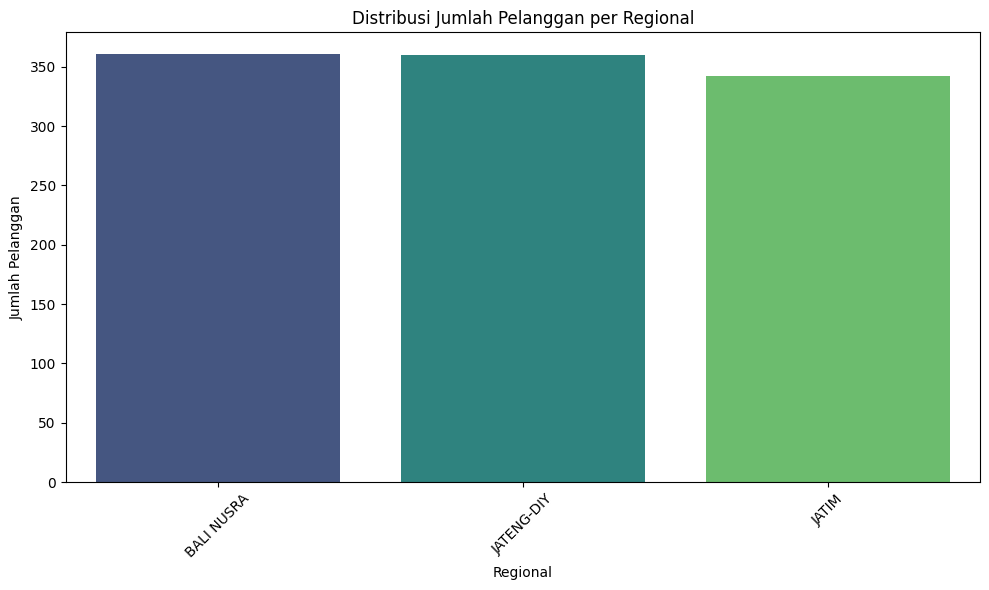

BRANCH
KUPANG        100
FLORES         90
MATARAM        90
MADIUN         90
DENPASAR       81
SEMARANG       81
SURAKARTA      81
PEKALONGAN     72
JEMBER         63
MAGELANG       54
MALANG         54
SIDOARJO       54
SURABAYA       45
PURWOKERTO     36
YOGYAKARTA     36
LAMONGAN       36
Name: count, dtype: int64

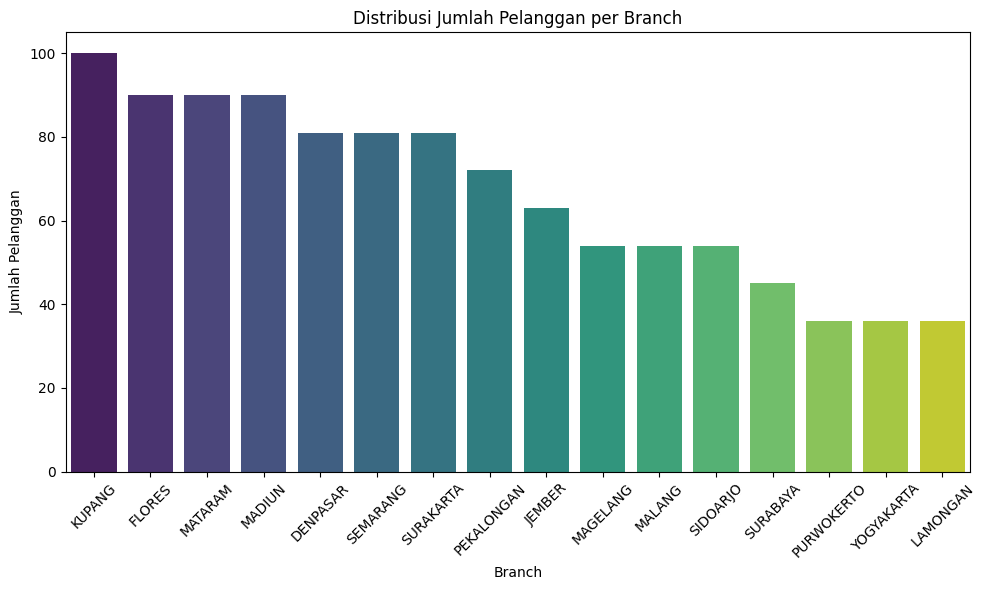

CLUSTER
LOMBOK                45
MANGGARAI             45
SUMBA                 37
MALAKA TIMTIM BELU    36
YOGYAKARTA            36
MADIUN                36
MADURA                36
BALI TIMUR            36
TULUNGAGUNG           27
JOMBANG MOJOKERTO     27
Name: count, dtype: int64


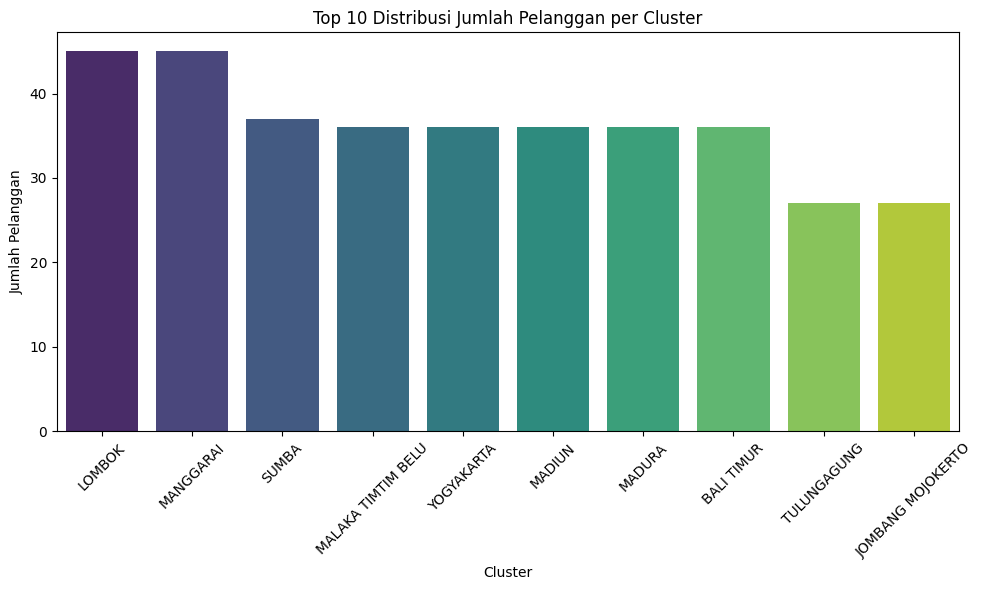

In [30]:
# ===========================================
# EDA GEOGRAFIS
# ===========================================

# Menghitung jumlah pelanggan per Regional
branch_counts = data['REGIONAL'].value_counts()
display(branch_counts)

# Membuat grafik batang
plt.figure(figsize=(10, 6))
sns.barplot(x=branch_counts.index,y=branch_counts.values, palette='viridis')

# Menambahkan label dan judul
plt.xlabel('Regional')
plt.ylabel('Jumlah Pelanggan')
plt.title('Distribusi Jumlah Pelanggan per Regional')
plt.xticks(rotation=45)  # Rotasi label sumbu x agar lebih mudah dibaca
plt.tight_layout()

# Menampilkan grafik
plt.show()

# Menghitung jumlah pelanggan per Branch
branch_counts = data['BRANCH'].value_counts()
display(branch_counts)

# Membuat grafik batang
plt.figure(figsize=(10, 6))
sns.barplot(x=branch_counts.index,y=branch_counts.values, palette='viridis')

# Menambahkan label dan judul
plt.xlabel('Branch')
plt.ylabel('Jumlah Pelanggan')
plt.title('Distribusi Jumlah Pelanggan per Branch')
plt.xticks(rotation=45)  
plt.tight_layout()

# Menampilkan grafik
plt.show()

# Menghitung jumlah pelanggan per Cluster
cluster_counts = data['CLUSTER'].value_counts().head(10)  
print(cluster_counts)

# Membuat grafik batang
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')

# Menambahkan label dan judul
plt.xlabel('Cluster')
plt.ylabel('Jumlah Pelanggan')
plt.title('Top 10 Distribusi Jumlah Pelanggan per Cluster')
plt.xticks(rotation=45)  # Rotasi label sumbu x agar lebih mudah dibaca
plt.tight_layout()

# Menampilkan grafik
plt.show()


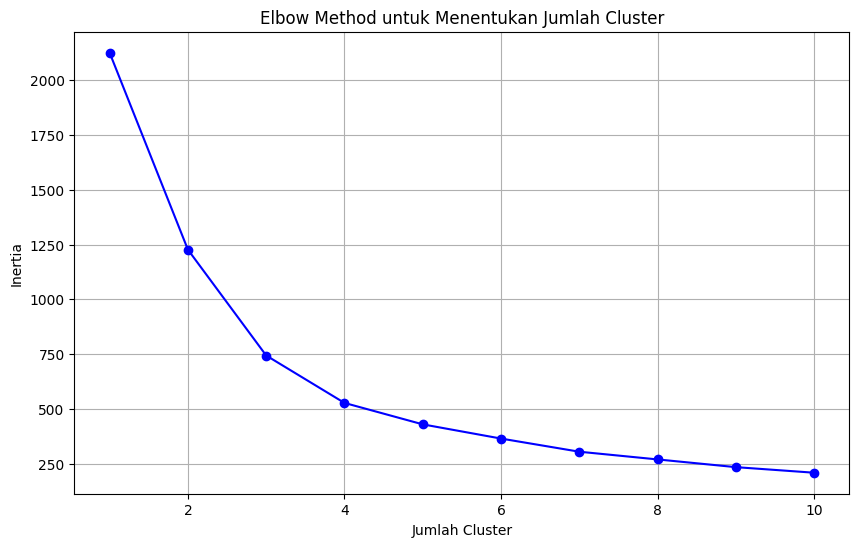

In [31]:
# ===========================================
# ELBHOW METHOD
# ===========================================

# Persiapan Data
# Memilih kolom yang relevan untuk clustering
try:
    features = data[['OMSET TOTAL', 'ACTIVE RATIO']]  
except KeyError as e:
    raise KeyError("Kolom yang dipilih tidak ditemukan dalam dataset: 'OMSET TOTAL' atau 'ACTIVE RATIO'")

# Normalisasi Data
# Standardisasi fitur agar skala variabel tidak mempengaruhi hasil clustering
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Menentukan Jumlah Cluster yang Optimal
# Elbow Method untuk menentukan jumlah cluster yang optimal
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)
    

# Visualisasi Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', color='b', label='Inertia')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster')
plt.grid(True)
plt.show()


In [32]:
# ===========================================
# JUMLAH CLUSTER TERBAIK
# ===========================================

# Menentukan jumlah cluster optimal
optimal_clusters = 3  

# Clustering dengan K-Means
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(features_scaled)

# Menampilkan Hasil Clustering
print("\nHasil Clustering Pelanggan:")
display(data[['BRANCH', 'CLUSTER', 'CITY', 'Cluster']].head())

# Analisis Hasil Clustering
print("\nJumlah Pelanggan per Cluster:")
display(data['Cluster'].value_counts())



Hasil Clustering Pelanggan:


,BRANCH,CLUSTER,CITY,Cluster
0,DENPASAR,BALI BARAT,BULELENG,0
1,DENPASAR,BALI BARAT,JEMBRANA,0
2,DENPASAR,BALI BARAT,TABANAN,0
3,DENPASAR,BALI TENGAH,BADUNG,0
4,DENPASAR,BALI TENGAH,KOTA DENPASAR,1



Jumlah Pelanggan per Cluster:


Cluster
0    654
1    227
2    182
Name: count, dtype: int64

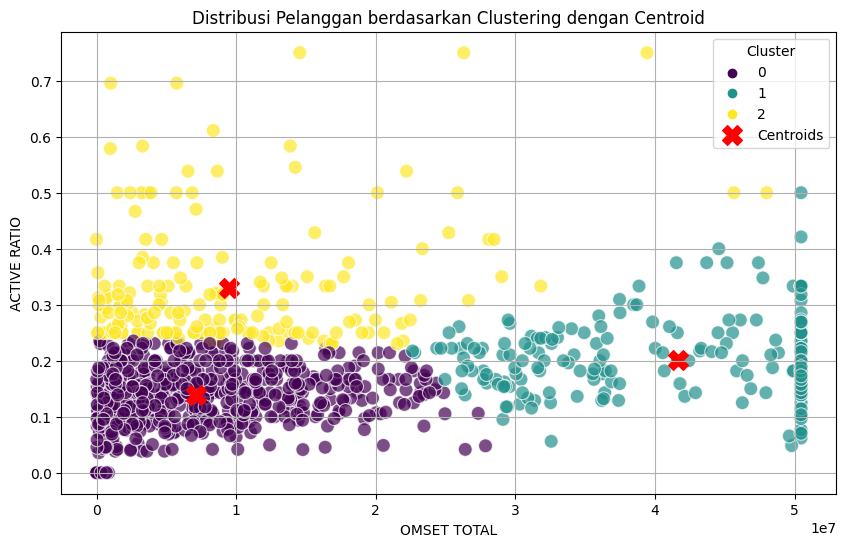

In [33]:
# ===========================================
# CENTROID
# ===========================================

# Ambil centroid dari model K-Means
centroids = kmeans.cluster_centers_

# Kembalikan centroid ke skala asli
centroids_original_scale = scaler.inverse_transform(centroids)  

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))

# Scatter plot untuk data
sns.scatterplot(
    x=data['OMSET TOTAL'], 
    y=data['ACTIVE RATIO'], 
    hue=data['Cluster'], 
    palette='viridis', 
    s=100, 
    alpha=0.7
)

# Tambahkan centroid ke dalam plot
plt.scatter(
    centroids_original_scale[:, 0], 
    centroids_original_scale[:, 1], 
    c='red', 
    s=200, 
    marker='X', 
    label='Centroids'
)

# Tambahkan elemen visual lainnya
plt.title('Distribusi Pelanggan berdasarkan Clustering dengan Centroid')
plt.xlabel('OMSET TOTAL')
plt.ylabel('ACTIVE RATIO')
plt.legend(title='Cluster', loc='best')
plt.grid(True)

# Tampilkan plot
plt.show()


In [34]:
# ===========================================
# EVALUASI MODEL
# ===========================================

# Evaluasi Model K-Means dengan Silhouette Score
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score
sil_score = silhouette_score(features_scaled, data['Cluster'])

# Menampilkan hasil Silhouette Score
print(f"Silhouette Score: {sil_score:.4f}")

# Kesimpulan berdasarkan nilai Silhouette Score
if sil_score > 0.5:
    print("Model clustering bagus! Cluster terpisah dengan jelas dan berbeda.")
elif sil_score > 0:
    print("Model clustering dapat diterima. Ada beberapa tumpang tindih antar cluster, tetapi masih bisa dibedakan.")
else:
    print("Model clustering buruk. Cluster tidak terpisah dengan baik, dan titik data mungkin masuk ke cluster yang salah.")


Silhouette Score: 0.5079
Model clustering bagus! Cluster terpisah dengan jelas dan berbeda.


In [35]:
# Penjelasan untuk Setiap Cluster
print("\nPenjelasan untuk Setiap Cluster:")

for cluster_id in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == cluster_id]
    omset_mean = cluster_data[['OMSET TOTAL', 'ACTIVE RATIO']].mean()  # Mengambil rata-rata OMSET TOTAL dan ACTIVE RATIO
    omset_desc = "Tinggi" if omset_mean['OMSET TOTAL'] > data['OMSET TOTAL'].mean() else "Rendah"
    
    print(f"\nCluster {cluster_id}:")
    print(f"- Rata-rata OMSET TOTAL: {omset_mean['OMSET TOTAL']:.2f} ({omset_desc})")
    print(f"- Rata-rata ACTIVE RATIO: {omset_mean['ACTIVE RATIO']:.2f}")
    
    if omset_desc == "Tinggi":
        print("- Cluster ini memiliki potensi tinggi berdasarkan OMSET TOTAL.")
    else:
        print("- Cluster ini memiliki potensi rendah berdasarkan OMSET TOTAL.")



Penjelasan untuk Setiap Cluster:

Cluster 0:
- Rata-rata OMSET TOTAL: 7126530.36 (Rendah)
- Rata-rata ACTIVE RATIO: 0.14
- Cluster ini memiliki potensi rendah berdasarkan OMSET TOTAL.

Cluster 1:
- Rata-rata OMSET TOTAL: 41639655.48 (Tinggi)
- Rata-rata ACTIVE RATIO: 0.20
- Cluster ini memiliki potensi tinggi berdasarkan OMSET TOTAL.

Cluster 2:
- Rata-rata OMSET TOTAL: 9522700.51 (Rendah)
- Rata-rata ACTIVE RATIO: 0.33
- Cluster ini memiliki potensi rendah berdasarkan OMSET TOTAL.


In [36]:
# ===========================================
# VALIDASI MODEL
# ===========================================

# Validasi Pseudo F-statistic
# Menghitung Within-Cluster Sum of Squares (WCSS) dan Between-Cluster Sum of Squares (BCSS)
wcss = kmeans.inertia_  # WCSS sudah dihitung oleh K-Means
bcss = np.sum(cdist(features_scaled, centroids, 'euclidean')**2) - wcss

# Pseudo F-statistic
pseudo_f = (bcss / (optimal_clusters - 1)) / (wcss / (features_scaled.shape[0] - optimal_clusters))
print(f"\nPseudo F-statistic: {pseudo_f:.4f}")

# Evaluasi Pseudo F-statistic
if pseudo_f > 1:
    print("Cluster dianggap sangat baik berdasarkan Pseudo F-statistic.")
elif pseudo_f > 0.5:
    print("Cluster cukup baik, tetapi ada kemungkinan untuk meningkatkan kualitas clustering.")
else:
    print("Cluster kurang baik berdasarkan Pseudo F-statistic.")



Pseudo F-statistic: 8319.1676
Cluster dianggap sangat baik berdasarkan Pseudo F-statistic.


In [37]:
# Strategi Pemetaan Target Konsumen
strategies = {}

# Menentukan strategi berdasarkan cluster
for cluster_id in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == cluster_id]
    omset_mean = cluster_data[['OMSET TOTAL', 'ACTIVE RATIO']].mean()  # Mengambil rata-rata OMSET TOTAL dan ACTIVE RATIO
    omset_desc = "Tinggi" if omset_mean['OMSET TOTAL'] > data['OMSET TOTAL'].mean() else "Rendah"
    
    # Menentukan strategi untuk setiap cluster
    if omset_desc == "Tinggi":
        if omset_mean['ACTIVE RATIO'] > data['ACTIVE RATIO'].mean():
            strategies[cluster_id] = "Fokus pada retensi pelanggan melalui program loyalitas, peningkatan produk, dan peningkatan kualitas layanan."
        else:
            strategies[cluster_id] = "Fokus pada promosi yang meningkatkan engagement untuk mempertahankan omzet tinggi."
    else:
        if omset_mean['ACTIVE RATIO'] > data['ACTIVE RATIO'].mean():
            strategies[cluster_id] = "Fokus pada peningkatan omzet melalui penawaran khusus dan promosi untuk mendorong aktivitas lebih tinggi."
        else:
            strategies[cluster_id] = "Fokus pada segmentasi ulang dengan memberikan tawaran produk yang lebih relevan atau peningkatan layanan."

# Menampilkan strategi untuk setiap cluster
print("\nStrategi untuk Setiap Cluster:")
for cluster_id, strategy in strategies.items():
    print(f"\nCluster {cluster_id}: {strategy}")



Strategi untuk Setiap Cluster:

Cluster 0: Fokus pada segmentasi ulang dengan memberikan tawaran produk yang lebih relevan atau peningkatan layanan.

Cluster 1: Fokus pada retensi pelanggan melalui program loyalitas, peningkatan produk, dan peningkatan kualitas layanan.

Cluster 2: Fokus pada peningkatan omzet melalui penawaran khusus dan promosi untuk mendorong aktivitas lebih tinggi.


In [38]:
# Implementasi Strategi dalam Pemetaan Target Konsumen
# Mengidentifikasi konsumen dalam cluster tertentu untuk pemasaran terarah
target_consumer_map = {}
for cluster_id in range(optimal_clusters):
    target_consumers = data[data['Cluster'] == cluster_id]
    target_consumer_map[cluster_id] = target_consumers[['BRANCH', 'CLUSTER', 'CITY', 'OMSET TOTAL', 'ACTIVE RATIO']]

# Menampilkan konsumen yang akan menjadi target strategi
print("\nPemetaan Target Konsumen Berdasarkan Cluster:")
for cluster_id, target_consumers in target_consumer_map.items():
    print(f"\nCluster {cluster_id}:")
    display(target_consumers.head())



Pemetaan Target Konsumen Berdasarkan Cluster:

Cluster 0:


,BRANCH,CLUSTER,CITY,OMSET TOTAL,ACTIVE RATIO
0,DENPASAR,BALI BARAT,BULELENG,11043601,0.071429
1,DENPASAR,BALI BARAT,JEMBRANA,14135322,0.130435
2,DENPASAR,BALI BARAT,TABANAN,8446941,0.150000
3,DENPASAR,BALI TENGAH,BADUNG,24862947,0.142857
5,DENPASAR,BALI TIMUR,BANGLI,14542815,0.120000



Cluster 1:


,BRANCH,CLUSTER,CITY,OMSET TOTAL,ACTIVE RATIO
4,DENPASAR,BALI TENGAH,KOTA DENPASAR,32561574,0.056075
9,FLORES,ENDE SIKKA,ENDE,50455035,0.200000
10,FLORES,ENDE SIKKA,SIKKA,50455035,0.173913
11,FLORES,FLORES TIMUR,ALOR,49888637,0.333333
12,FLORES,FLORES TIMUR,FLORES TIMUR,35801991,0.230769



Cluster 2:


,BRANCH,CLUSTER,CITY,OMSET TOTAL,ACTIVE RATIO
13,FLORES,FLORES TIMUR,LEMBATA,47998003,0.50
16,FLORES,MANGGARAI,MANGGARAI TIMUR,9070265,0.25
21,KUPANG,KUPANG ROTE,ROTE NDAO,7533238,0.25
22,KUPANG,MALAKA TIMTIM BELU,BELU,19468159,0.25
23,KUPANG,MALAKA TIMTIM BELU,MALAKA,25857025,0.50


# INSTUISI DAN WAWASAN DATA

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

In [42]:
# Membaca data dari file CSV
file_path = "C:/Users/user/Downloads/MY MAGANG 5/DATA TELKOMSEL/EVENTS/output EVENTS alls.csv"

data = pd.read_csv(file_path, sep=';')  # Ganti dengan pemisah yang sesuai
# Tampilkan DataFrame 
data.head()   #1071 rows × 25 columns
data
  

,AREA,REGIONAL,BRANCH,CLUSTER,CITY,DS TOTAL,DS ACTIVE,DS RATIO (%),OMSET TRX DIGITAL,OMSET TOTAL,...,ACTUAL POI,PLAN EVENT,ACTUAL EVENT,ACTUAL CALL (%),SALES,OTA,SALES ORBIT,VF,TRX DIGITAL,OMSET TOTAL.1
0,JAWA - BALI - NUSRA,BALI NUSRA,DENPASAR,BALI BARAT,BULELENG,42,3,7.1,39,11043601,...,37,72,50,69.0,0,0,0,0,29,7571338
1,JAWA - BALI - NUSRA,BALI NUSRA,DENPASAR,BALI BARAT,JEMBRANA,23,3,13.0,39,14135322,...,43,75,56,75.0,0,0,0,0,30,9645984
2,JAWA - BALI - NUSRA,BALI NUSRA,DENPASAR,BALI BARAT,TABANAN,20,3,15.0,37,8446941,...,46,53,48,91.0,5,0,0,0,36,6186318
3,JAWA - BALI - NUSRA,BALI NUSRA,DENPASAR,BALI TENGAH,BADUNG,42,6,14.3,92,24862947,...,77,156,100,64.0,59,0,0,125,89,14242962
4,JAWA - BALI - NUSRA,BALI NUSRA,DENPASAR,BALI TENGAH,KOTA DENPASAR,107,6,5.6,84,32561574,...,29,152,105,69.0,6,0,0,38,80,26199164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,JAWA - BALI - NUSRA,JATIM,SURABAYA,KOTA SURABAYA,KOTA SURABAYA,197,13,6.6,18,9563982,...,43,51,49,96.0,24,0,0,0,18,9354340
1067,JAWA - BALI - NUSRA,JATIM,SURABAYA,MADURA,BANGKALAN,36,4,11.1,0,3282292,...,1,4,4,100.0,0,0,0,0,0,2409770
1068,JAWA - BALI - NUSRA,JATIM,SURABAYA,MADURA,PAMEKASAN,32,4,12.5,0,3308591,...,1,4,4,100.0,11,0,0,0,0,2045331
1069,JAWA - BALI - NUSRA,JATIM,SURABAYA,MADURA,SAMPANG,24,4,16.7,0,1364900,...,1,5,4,80.0,37,0,0,0,0,1332690


In [43]:
# Informasi awal data
print(data.info())  # Menampilkan tipe data dan jumlah nilai kosong
display(data.describe())  # Statistik deskriptif

# Mengidentifikasi kolom yang bertipe int dan float
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Mengisi nilai kosong hanya pada kolom numerik (int dan float) dengan rata-rata
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# Mengecek nilai kosong setelah penanganan
print("Jumlah Nilai Kosong per Kolom setelah fillna() pada kolom numerik:")
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AREA               1071 non-null   object 
 1   REGIONAL           1071 non-null   object 
 2   BRANCH             1071 non-null   object 
 3   CLUSTER            1071 non-null   object 
 4   CITY               1071 non-null   object 
 5   DS TOTAL           1071 non-null   int64  
 6   DS ACTIVE          1071 non-null   int64  
 7   DS RATIO (%)       1071 non-null   float64
 8   OMSET TRX DIGITAL  1071 non-null   int64  
 9   OMSET TOTAL        1071 non-null   int64  
 10  OMSET DATA         1071 non-null   int64  
 11  OMSET DIGITAL      1071 non-null   int64  
 12  OMSET RECHARGE     1071 non-null   int64  
 13  OMSET OTHER        1071 non-null   int64  
 14  PLAN POI           1071 non-null   int64  
 15  ACTUAL POI         1071 non-null   int64  
 16  PLAN EVENT         1071 

,DS TOTAL,DS ACTIVE,DS RATIO (%),OMSET TRX DIGITAL,OMSET TOTAL,OMSET DATA,OMSET DIGITAL,OMSET RECHARGE,OMSET OTHER,PLAN POI,ACTUAL POI,PLAN EVENT,ACTUAL EVENT,ACTUAL CALL (%),SALES,OTA,SALES ORBIT,VF,TRX DIGITAL,OMSET TOTAL.1
count,1071.000000,1071.000000,1071.000000,1071.000000,1.071000e+03,1.071000e+03,1.071000e+03,1.071000e+03,1.071000e+03,1071.000000,1071.000000,1071.000000,1071.000000,1048.00000,1071.000000,1071.0,1071.0,1071.000000,1071.000000,1.071000e+03
mean,25.375350,4.000934,18.376284,13.258637,1.888419e+07,6.843531e+06,2.128169e+05,4.782331e+06,7.091268e+06,50.402428,44.005602,75.433240,61.576097,84.05916,173.809524,0.0,0.0,1.756303,15.788049,1.970746e+07
std,22.406756,2.507745,9.800493,31.300464,3.212128e+07,1.563192e+07,3.933167e+05,9.891758e+06,1.797012e+07,57.966600,49.657067,64.455701,53.208368,13.37578,319.142026,0.0,0.0,9.868263,34.379750,3.309869e+07
min,3.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,22.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00
25%,14.000000,2.500000,12.200000,0.000000,2.735253e+06,6.762430e+05,0.000000e+00,3.250000e+05,4.624930e+05,16.000000,14.000000,39.000000,34.000000,76.00000,2.000000,0.0,0.0,0.000000,0.000000,3.839938e+06
50%,21.000000,3.000000,16.700000,1.000000,8.323268e+06,2.226175e+06,4.983000e+04,1.446000e+06,1.882650e+06,36.000000,32.000000,62.000000,50.000000,87.00000,61.000000,0.0,0.0,0.000000,2.000000,9.590240e+06
75%,28.000000,5.000000,23.100000,11.000000,2.167060e+07,6.625002e+06,2.416710e+05,4.443500e+06,6.134074e+06,65.000000,56.000000,94.000000,74.500000,95.00000,213.000000,0.0,0.0,0.000000,14.000000,2.192062e+07
max,226.000000,18.000000,75.000000,324.000000,2.999657e+08,1.684152e+08,3.748834e+06,9.646000e+07,2.526617e+08,625.000000,543.000000,634.000000,549.000000,100.00000,3403.000000,0.0,0.0,125.000000,323.000000,3.648003e+08


Jumlah Nilai Kosong per Kolom setelah fillna() pada kolom numerik:
AREA                 0
REGIONAL             0
BRANCH               0
CLUSTER              0
CITY                 0
DS TOTAL             0
DS ACTIVE            0
DS RATIO (%)         0
OMSET TRX DIGITAL    0
OMSET TOTAL          0
OMSET DATA           0
OMSET DIGITAL        0
OMSET RECHARGE       0
OMSET OTHER          0
PLAN POI             0
ACTUAL POI           0
PLAN EVENT           0
ACTUAL EVENT         0
ACTUAL CALL (%)      0
SALES                0
OTA                  0
SALES ORBIT          0
VF                   0
TRX DIGITAL          0
OMSET TOTAL.1        0
dtype: int64


In [44]:
# Mengubah kolom-kolom tertentu menjadi tipe string
data['BRANCH'] = data['BRANCH'].astype(str)
data['AREA'] = data['AREA'].astype(str)
data['REGIONAL'] = data['REGIONAL'].astype(str)
data['CLUSTER'] = data['CLUSTER'].astype(str)
data['CITY'] = data['CITY'].astype(str)
# Menghitung IQR untuk deteksi outlier
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mendeteksi outlier
outliers = ((data[numerical_columns] < lower_bound) | (data[numerical_columns] > upper_bound))
# print("Jumlah Outlier per Kolom:")
# print(outliers.sum())

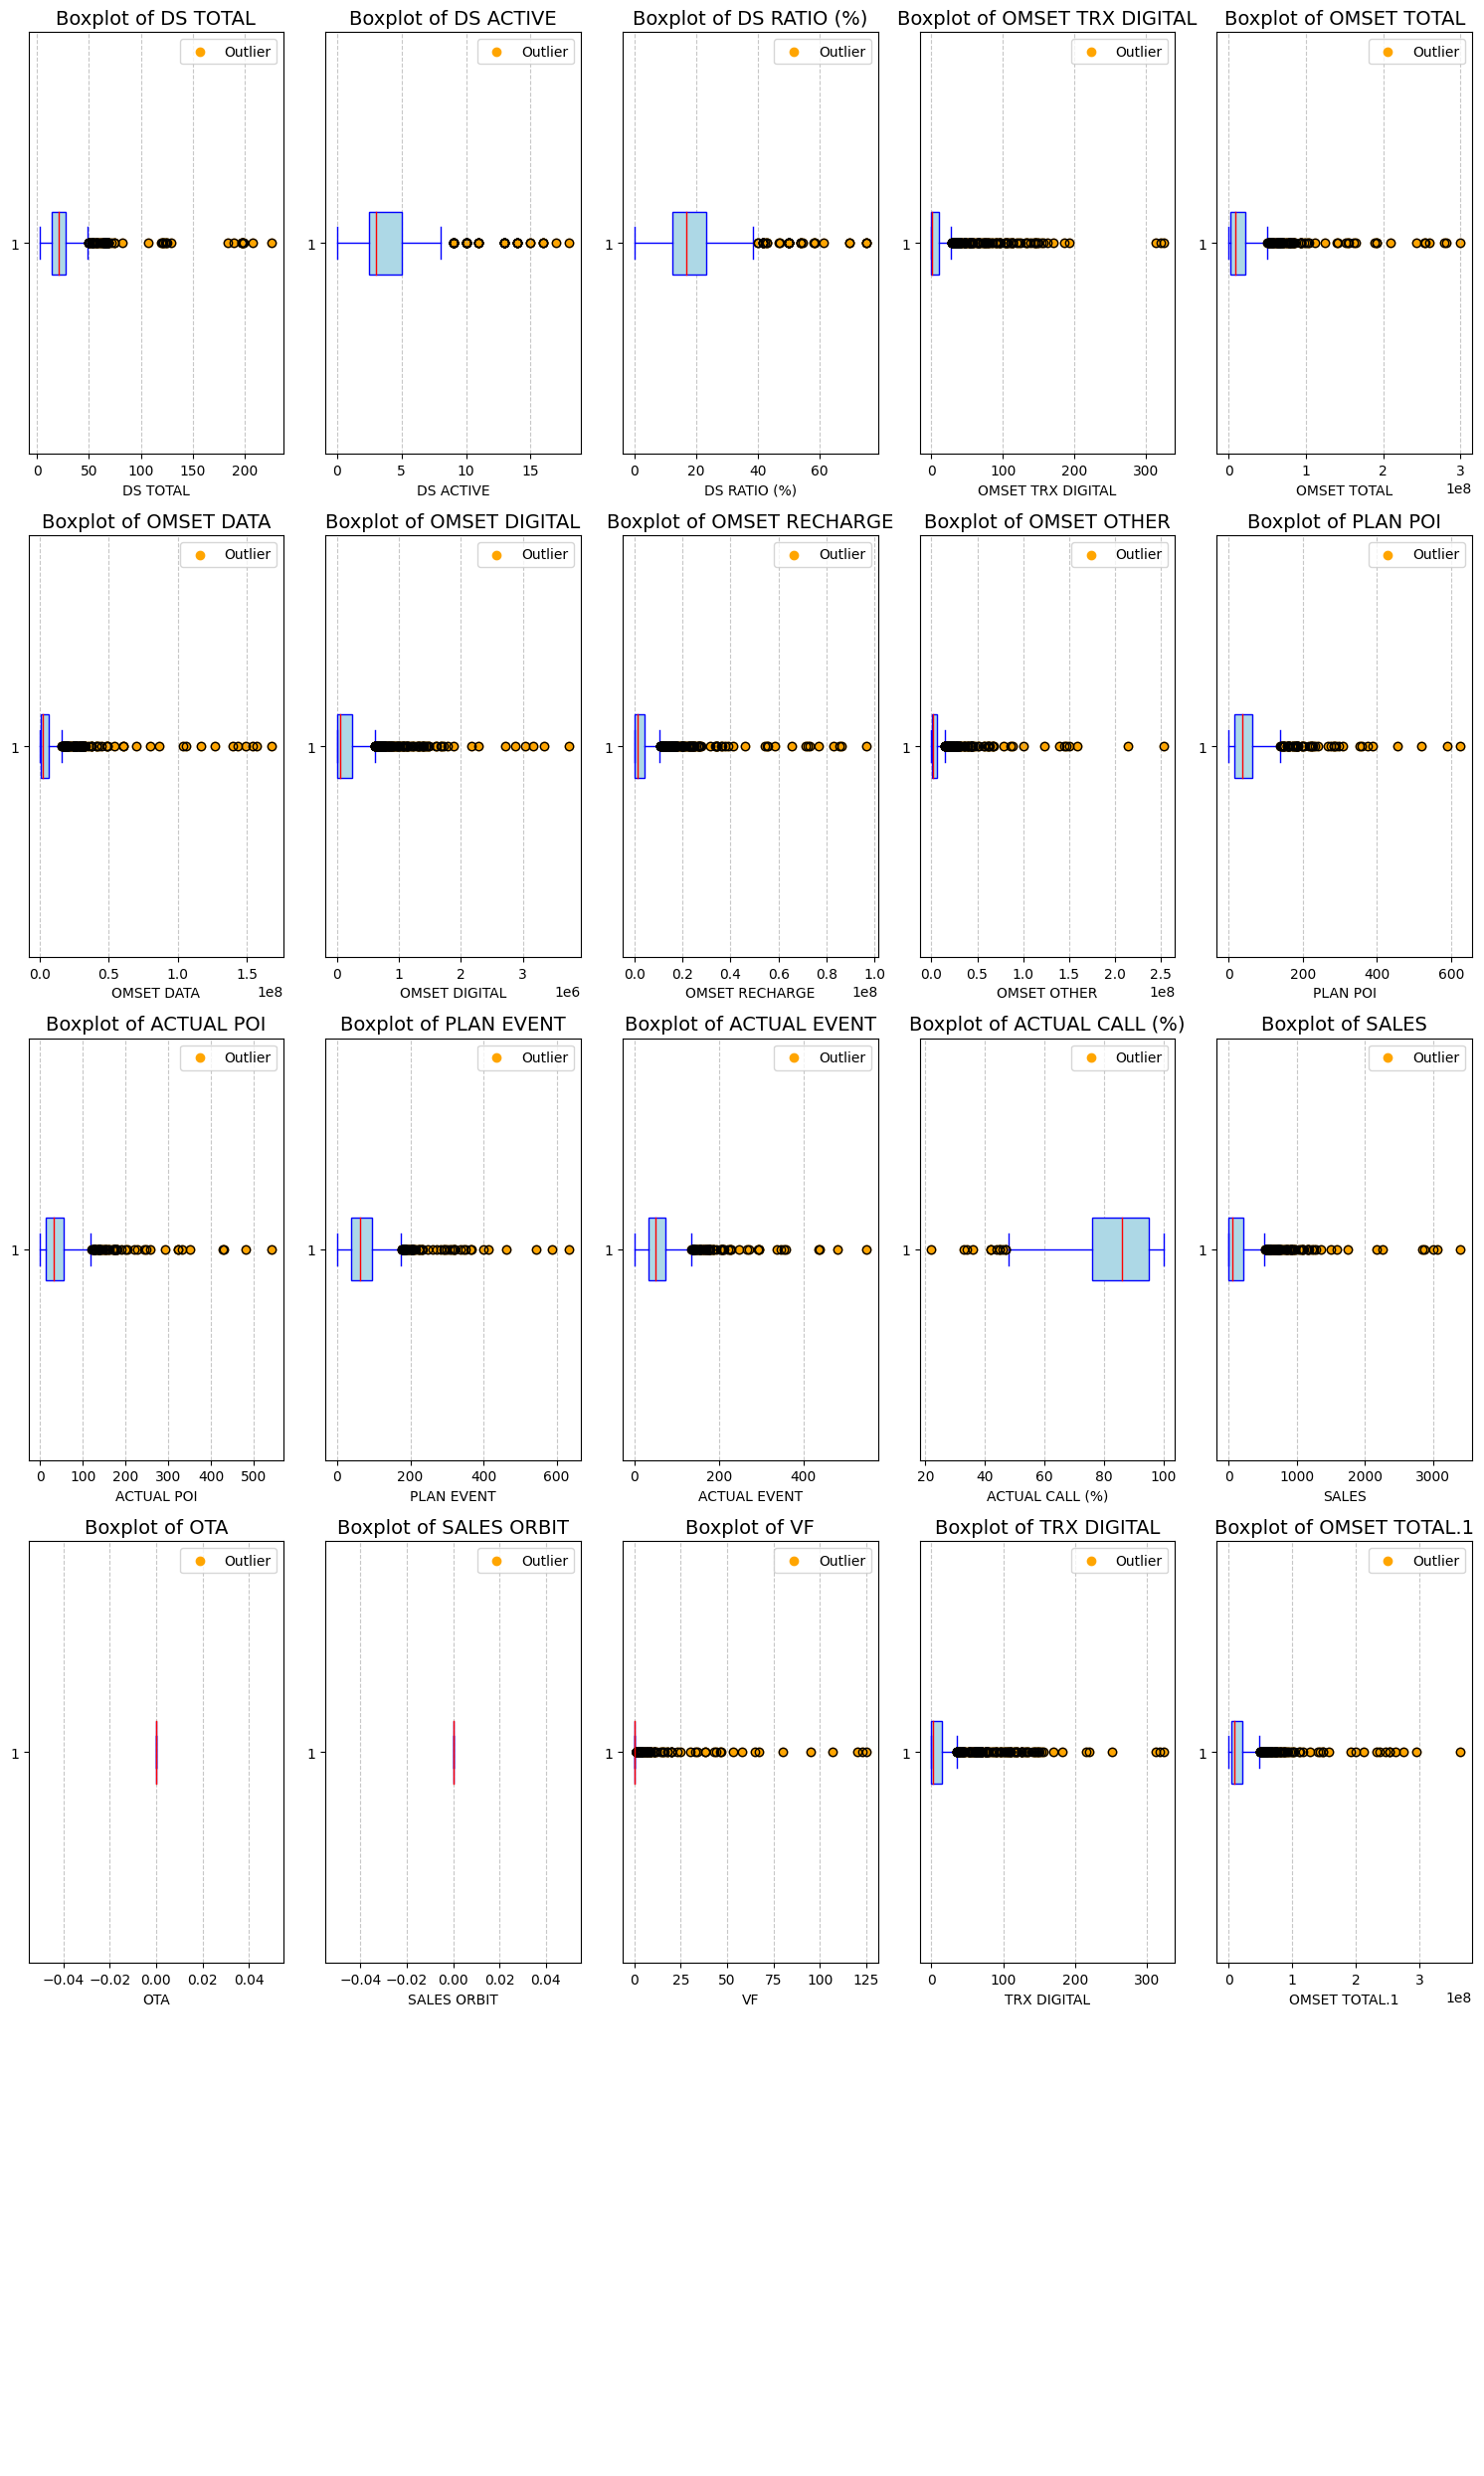

In [45]:

# Tentukan jumlah kolom dan baris untuk grid subplots
n_cols = 5  # Misalnya, 5 kolom untuk tampilan grid
n_rows = (len(numerical_columns) // n_cols) + 1  # Menentukan jumlah baris, sesuaikan dengan jumlah kolom

# Membuat figure dan axes untuk subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Meratakan axes jika jumlah kolom atau baris tidak sesuai
axes = axes.flatten()

# Visualisasi boxplot untuk setiap kolom numerik
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    
    # Membuat boxplot
    ax.boxplot(data[col].dropna(), vert=False, patch_artist=True,
               boxprops=dict(facecolor='lightblue', color='blue'),
               whiskerprops=dict(color='blue'),
               capprops=dict(color='blue'),
               medianprops=dict(color='red'))
    
    # Menambahkan titik untuk outlier berdasarkan IQR
    outlier_values = data[col][(data[col] < lower_bound[col]) | (data[col] > upper_bound[col])]
    ax.scatter(outlier_values, [1] * len(outlier_values), color='orange', label='Outlier')
    
    # Set title and labels
    ax.set_title(f"Boxplot of {col}", fontsize=14)
    ax.set_xlabel(col)
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Menampilkan legend
    ax.legend()

# Menyembunyikan axes yang tidak terpakai (jika ada)
for i in range(len(numerical_columns), len(axes)):
    axes[i].axis('off')

# Penyesuaian layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()


In [46]:
# Menghapus outlier berdasarkan IQR
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)  # Kuartil pertama
    Q3 = data[col].quantile(0.75)  # Kuartil ketiga
    IQR = Q3 - Q1  # Rentang interkuartil

    lower_bound = Q1 - 1.5 * IQR  # Batas bawah
    upper_bound = Q3 + 1.5 * IQR  # Batas atas

    # Hanya menyimpan data yang tidak termasuk outlier
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

print("Data setelah menghapus outlier:")
display(data)

Data setelah menghapus outlier:


,AREA,REGIONAL,BRANCH,CLUSTER,CITY,DS TOTAL,DS ACTIVE,DS RATIO (%),OMSET TRX DIGITAL,OMSET TOTAL,...,ACTUAL POI,PLAN EVENT,ACTUAL EVENT,ACTUAL CALL (%),SALES,OTA,SALES ORBIT,VF,TRX DIGITAL,OMSET TOTAL.1
16,JAWA - BALI - NUSRA,BALI NUSRA,FLORES,MANGGARAI,MANGGARAI TIMUR,8,2,25.0,4,9070265,...,9,53,35,66.00000,0,0,0,0,4,6417536
29,JAWA - BALI - NUSRA,BALI NUSRA,KUPANG,SUMBA,SUMBA TENGAH,3,0,0.0,0,0,...,0,0,0,84.05916,0,0,0,0,0,0
32,JAWA - BALI - NUSRA,BALI NUSRA,MATARAM,LOMBOK,LOMBOK BARAT,15,2,13.3,0,6476675,...,10,49,28,57.00000,0,0,0,0,0,2053100
34,JAWA - BALI - NUSRA,BALI NUSRA,MATARAM,LOMBOK,LOMBOK TIMUR,30,5,16.7,5,5487809,...,10,52,52,100.00000,0,0,0,0,4,3961520
42,JAWA - BALI - NUSRA,JATENG-DIY,MAGELANG,KEBUMEN,KULON PROGO,17,0,0.0,0,0,...,0,0,0,84.05916,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,JAWA - BALI - NUSRA,JATIM,SIDOARJO,SIDOARJO PASURUAN,PASURUAN,16,3,18.8,0,165200,...,7,8,7,88.00000,6,0,0,0,0,50000
1067,JAWA - BALI - NUSRA,JATIM,SURABAYA,MADURA,BANGKALAN,36,4,11.1,0,3282292,...,1,4,4,100.00000,0,0,0,0,0,2409770
1068,JAWA - BALI - NUSRA,JATIM,SURABAYA,MADURA,PAMEKASAN,32,4,12.5,0,3308591,...,1,4,4,100.00000,11,0,0,0,0,2045331
1069,JAWA - BALI - NUSRA,JATIM,SURABAYA,MADURA,SAMPANG,24,4,16.7,0,1364900,...,1,5,4,80.00000,37,0,0,0,0,1332690


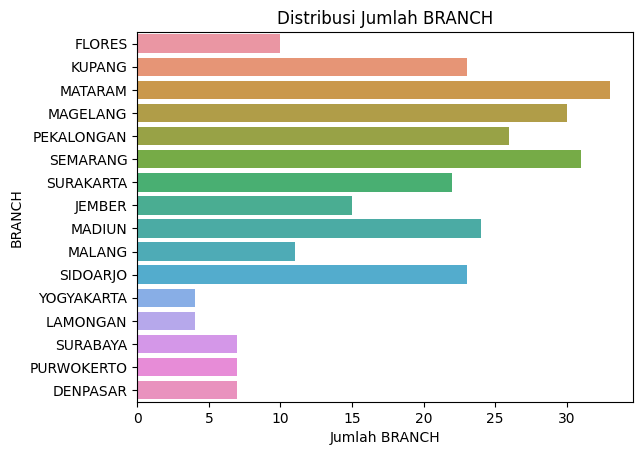

In [47]:
# Visualisasi distribusi jumlah kategori pada BRANCH
sns.countplot(y='BRANCH', data=data)
plt.title('Distribusi Jumlah BRANCH')
plt.xlabel('Jumlah BRANCH')
plt.ylabel('BRANCH')
plt.show()


In [48]:
# Menghitung rata-rata DS ACTIVE berdasarkan kombinasi BRANCH dan CITY
active_area = data.groupby(['AREA', 'BRANCH', 'CITY'], observed=True)['DS ACTIVE'].mean().reset_index()

# Area dengan DS ACTIVE tertinggi dan terendah
top_area = active_area.sort_values(by='DS ACTIVE', ascending=False).head(5)
bottom_area = active_area.sort_values(by='DS ACTIVE', ascending=True).head(5)

# Menampilkan Rekomendasi
print("Rekomendasi: Fokuskan event di kombinasi Area dengan jumlah pengguna tertinggi:")
display(top_area)

print("\nRekomendasi: Fokuskan upaya event di kombinasi Area dengan jumlah pengguna terendah:")
display(bottom_area)


Rekomendasi: Fokuskan event di kombinasi Area dengan jumlah pengguna tertinggi:


,AREA,BRANCH,CITY,DS ACTIVE
28,JAWA - BALI - NUSRA,MADIUN,KOTA KEDIRI,6.500000
1,JAWA - BALI - NUSRA,DENPASAR,GIANYAR,6.000000
54,JAWA - BALI - NUSRA,MATARAM,SUMBAWA,6.000000
55,JAWA - BALI - NUSRA,PEKALONGAN,BATANG,5.666667
25,JAWA - BALI - NUSRA,LAMONGAN,BOJONEGORO,5.333333



Rekomendasi: Fokuskan upaya event di kombinasi Area dengan jumlah pengguna terendah:


,AREA,BRANCH,CITY,DS ACTIVE
21,JAWA - BALI - NUSRA,KUPANG,SUMBA TENGAH,0.0
9,JAWA - BALI - NUSRA,FLORES,NAGEKEO,1.0
27,JAWA - BALI - NUSRA,MADIUN,KEDIRI,1.0
38,JAWA - BALI - NUSRA,MAGELANG,KOTA MAGELANG,1.0
18,JAWA - BALI - NUSRA,KUPANG,SABU RAIJUA,1.0


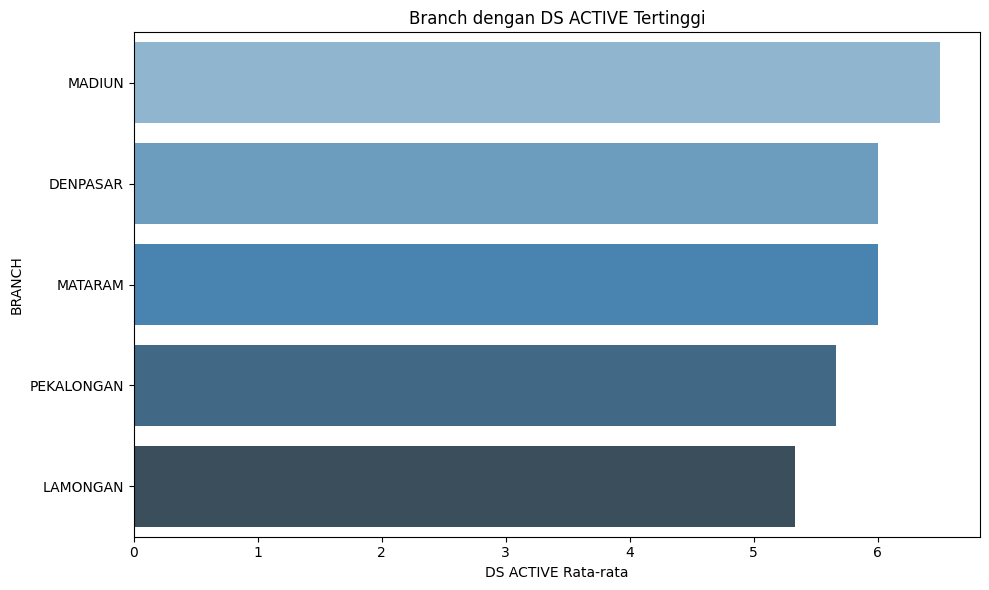

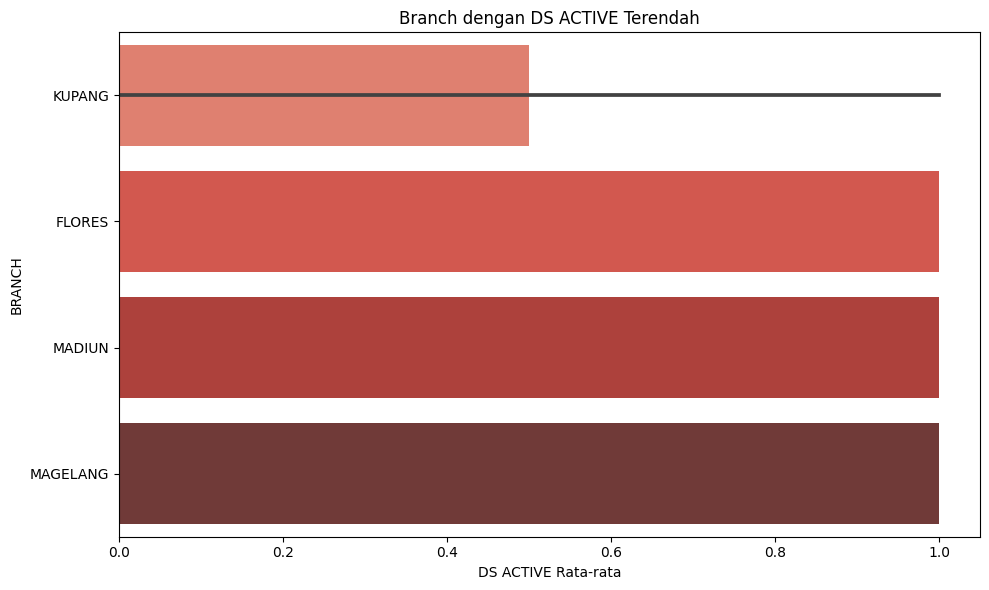

In [49]:
# Bar plot untuk area dengan DS ACTIVE tertinggi
plt.figure(figsize=(10, 6))
sns.barplot(data=top_area, x='DS ACTIVE', y='BRANCH', palette='Blues_d')
plt.title('Branch dengan DS ACTIVE Tertinggi')
plt.xlabel('DS ACTIVE Rata-rata')
plt.ylabel('BRANCH')
plt.tight_layout()
plt.show()

# Bar plot untuk area dengan DS ACTIVE terendah
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_area, x='DS ACTIVE', y='BRANCH', palette='Reds_d')
plt.title('Branch dengan DS ACTIVE Terendah')
plt.xlabel('DS ACTIVE Rata-rata')
plt.ylabel('BRANCH')
plt.tight_layout()
plt.show()

# STATSADA DAN ANALISIS KEBIJAKAN

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [53]:
# ===========================================
# IMPORT DATA
# ===========================================

# Membaca data dari file CSV
file_path = "C:/Users/user/Downloads/MY MAGANG 5/DATA TELKOMSEL/EVENTS/output EVENTS alls.csv"

# Pastikan untuk menyesuaikan delimiter jika berbeda
data = pd.read_csv(file_path, sep=';')

# Menghapus kolom 'OMSET TOTAL.1' langsung
data.drop(columns=['OMSET TOTAL.1'], inplace=True)

# Mengisi nilai yang hilang dengan 0
data.fillna(0, inplace=True)

# Menghapus data duplikat
data.drop_duplicates(inplace=True)

# Memfilter data hanya untuk kolom 'BRANCH' dengan nilai 'SURABAYA'
data_surabaya = data[data['BRANCH'] == 'SURABAYA']

# Menampilkan data yang telah difilter
# display(data_surabaya.head())

# Mengubah tipe data yang numerik menjadi integer (int)
data = data.apply(pd.to_numeric, errors='ignore')

# Mengonversi kolom numerik menjadi int (kecuali kolom yang tidak bisa diubah)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Mengubah tipe data numerik menjadi int
data[numeric_columns] = data[numeric_columns].astype('int')

# Menampilkan data yang telah diubah tipe datanya
# display(data.head())
# data.dtypes
data


C:\Users\user\AppData\Local\Temp\ipykernel_19680\1143311240.py:27: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


,AREA,REGIONAL,BRANCH,CLUSTER,CITY,DS TOTAL,DS ACTIVE,DS RATIO (%),OMSET TRX DIGITAL,OMSET TOTAL,...,PLAN POI,ACTUAL POI,PLAN EVENT,ACTUAL EVENT,ACTUAL CALL (%),SALES,OTA,SALES ORBIT,VF,TRX DIGITAL
0,JAWA - BALI - NUSRA,BALI NUSRA,DENPASAR,BALI BARAT,BULELENG,42,3,7,39,11043601,...,49,37,72,50,69,0,0,0,0,29
1,JAWA - BALI - NUSRA,BALI NUSRA,DENPASAR,BALI BARAT,JEMBRANA,23,3,13,39,14135322,...,48,43,75,56,75,0,0,0,0,30
2,JAWA - BALI - NUSRA,BALI NUSRA,DENPASAR,BALI BARAT,TABANAN,20,3,15,37,8446941,...,50,46,53,48,91,5,0,0,0,36
3,JAWA - BALI - NUSRA,BALI NUSRA,DENPASAR,BALI TENGAH,BADUNG,42,6,14,92,24862947,...,116,77,156,100,64,59,0,0,125,89
4,JAWA - BALI - NUSRA,BALI NUSRA,DENPASAR,BALI TENGAH,KOTA DENPASAR,107,6,5,84,32561574,...,32,29,152,105,69,6,0,0,38,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,JAWA - BALI - NUSRA,JATIM,SURABAYA,KOTA SURABAYA,KOTA SURABAYA,197,13,6,18,9563982,...,45,43,51,49,96,24,0,0,0,18
1067,JAWA - BALI - NUSRA,JATIM,SURABAYA,MADURA,BANGKALAN,36,4,11,0,3282292,...,1,1,4,4,100,0,0,0,0,0
1068,JAWA - BALI - NUSRA,JATIM,SURABAYA,MADURA,PAMEKASAN,32,4,12,0,3308591,...,1,1,4,4,100,11,0,0,0,0
1069,JAWA - BALI - NUSRA,JATIM,SURABAYA,MADURA,SAMPANG,24,4,16,0,1364900,...,2,1,5,4,80,37,0,0,0,0


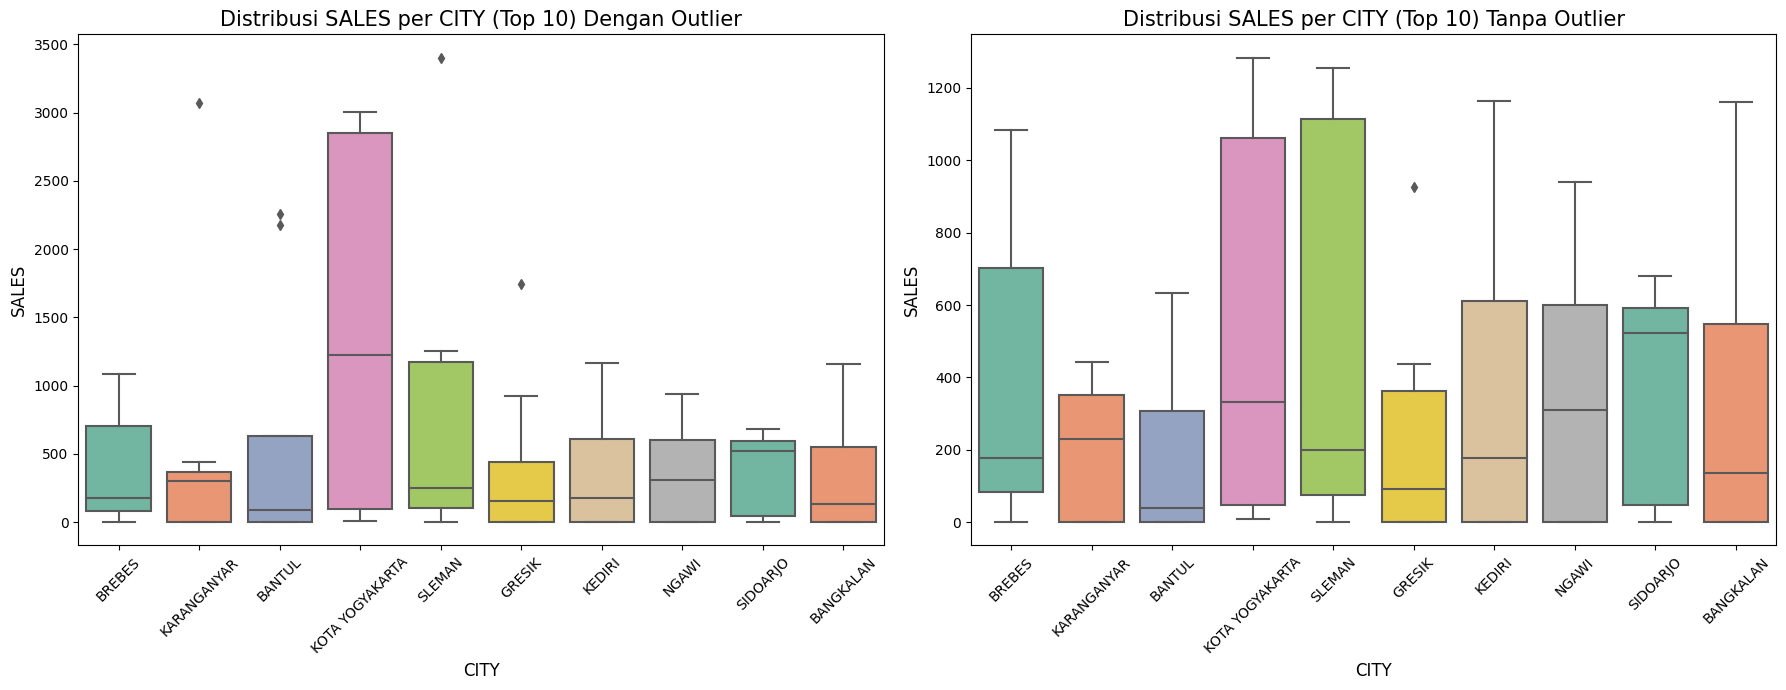

Top CITY dengan SALES terbesar setelah menghapus outlier:


CITY
SLEMAN             4025
BREBES             3488
KEDIRI             3307
BANGKALAN          3273
KOTA YOGYAKARTA    3213
NGAWI              3200
SIDOARJO           3120
GRESIK             1882
KARANGANYAR        1617
BANTUL             1282
Name: sum, dtype: int32

In [54]:
# ===========================================
# MENGECEK DAN MENANGANI OUTLIER
# ===========================================

# Mengelompokkan data berdasarkan CITY dan menghitung total SALES
sales_analysis = data.groupby('CITY')['SALES'].agg(['sum', 'mean', 'max', 'min', 'std', 'count'])

# Menampilkan Top 10 kota dengan total SALES tertinggi
top_10_sales = sales_analysis.sort_values(by='sum', ascending=False).head(10)

# Mengambil data Top 10 SALES berdasarkan CITY
top_10_data = data[data['CITY'].isin(top_10_sales.index)]

# Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga) untuk top_10_data
Q1 = top_10_data['SALES'].quantile(0.25)
Q3 = top_10_data['SALES'].quantile(0.75)

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk data yang tidak termasuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengambil data tanpa outlier
top_10_data_no_outliers = top_10_data[(top_10_data['SALES'] >= lower_bound) & (top_10_data['SALES'] <= upper_bound)]

# Boxplot distribusi SALES per CITY (Top 10) dengan dan tanpa outlier
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Boxplot dengan outlier
sns.boxplot(data=top_10_data, x='CITY', y='SALES', palette='Set2', ax=axes[0])
axes[0].set_title('Distribusi SALES per CITY (Top 10) Dengan Outlier', fontsize=15)
axes[0].set_xlabel('CITY', fontsize=12)
axes[0].set_ylabel('SALES', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Boxplot tanpa outlier
sns.boxplot(data=top_10_data_no_outliers, x='CITY', y='SALES', palette='Set2', ax=axes[1])
axes[1].set_title('Distribusi SALES per CITY (Top 10) Tanpa Outlier', fontsize=15)
axes[1].set_xlabel('CITY', fontsize=12)
axes[1].set_ylabel('SALES', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Menghitung sales_sum tanpa outlier untuk top 10 cities
sales_analysis_no_outliers = top_10_data_no_outliers.groupby('CITY')['SALES'].agg(['sum', 'mean', 'max', 'min', 'std', 'count'])

# Menampilkan nilai SALES terbesar
top_city_sales = sales_analysis_no_outliers['sum'].sort_values(ascending=False).head(10)

# Menampilkan hasil
print("Top CITY dengan SALES terbesar setelah menghapus outlier:")
display(top_city_sales)


In [55]:
# ===========================================
# ANALISIS DESKRIPTIF
# ===========================================

# Analisis deskriptif setelah menghapus outlier
sales_analysis_no_outliers = top_10_data_no_outliers.groupby('CITY')['SALES'].agg(['sum', 'mean', 'max', 'min', 'std', 'count'])

# Menampilkan hasil analisis deskriptif setelah menghapus outlier
display(sales_analysis_no_outliers)

,sum,mean,max,min,std,count
CITY,,,,,,
BANGKALAN,3273,363.666667,1161,0,484.508514,9
BANTUL,1282,183.142857,632,0,272.843929,7
BREBES,3488,387.555556,1084,0,395.816912,9
GRESIK,1882,235.250000,925,0,325.842534,8
KARANGANYAR,1617,202.125000,442,0,184.705509,8
KEDIRI,3307,367.444444,1165,0,441.121613,9
KOTA YOGYAKARTA,3213,535.500000,1284,9,594.009680,6
NGAWI,3200,355.555556,940,0,331.515125,9
SIDOARJO,3120,346.666667,681,0,308.399903,9


In [56]:
# ===========================================
# UJI ANOVA
# ===========================================

# Uji ANOVA untuk memeriksa apakah ada perbedaan signifikan antara SALES di berbagai kota
anova_result = stats.f_oneway(*[data[data['CITY'] == city]['SALES'] for city in data['CITY'].unique()])

# Menampilkan hasil uji ANOVA
print("Hasil Uji ANOVA untuk perbedaan SALES antar kota:")
print(f'F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}')


Hasil Uji ANOVA untuk perbedaan SALES antar kota:
F-statistic: 2.948617988314765, p-value: 1.0966395637471248e-19


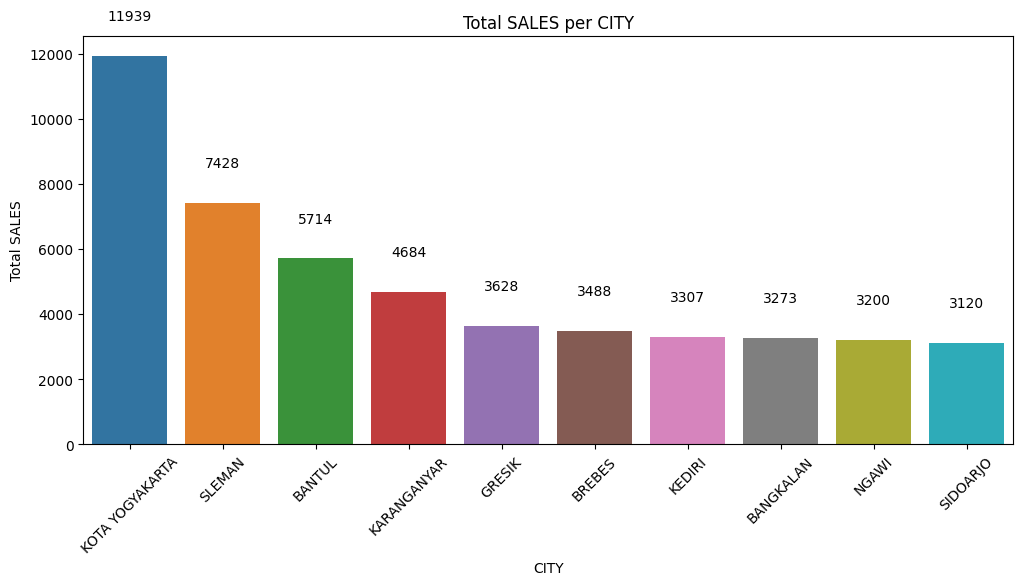

In [57]:
# Mengelompokkan data berdasarkan kota dan menghitung total SALES
city_sales = data.groupby('CITY')['SALES'].sum().sort_values(ascending=False).head(10)

# Menambahkan jarak antara label agar lebih rapi
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=city_sales.index, y=city_sales.values)
plt.title('Total SALES per CITY')
plt.xlabel('CITY')
plt.ylabel('Total SALES')
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2)  # Menambah ruang di bawah plot

# Menambahkan nilai di atas setiap batang
for i, v in enumerate(city_sales.values):
    ax.text(i, v + 1000, f'{v}', ha='center', va='bottom', fontsize=10)  # Menambahkan teks di atas batang

plt.show()


# KECERDASAN BISNIS

In [ ]:
import pandas as pd
import os

# Direktori di mana file Excel berada
folder_path = r'C:/Users/user/Downloads/Events'

# Daftar file Excel dengan ekstensi .xlsx
excel_files = [
    os.path.join(folder_path, 'Reporting_Events_202401.xlsx'),
    os.path.join(folder_path, 'Reporting_ Events _202402.xlsx'),
    os.path.join(folder_path, 'Reporting_ Events _202403.xlsx'),
    os.path.join(folder_path, 'Reporting_ Events _202404.xlsx'),
    os.path.join(folder_path, 'Reporting_ Events _202405.xlsx'),
    os.path.join(folder_path, 'Reporting_ Events _202406.xlsx'),
    os.path.join(folder_path, 'Reporting_ Events _202407.xlsx'),
    os.path.join(folder_path, 'Reporting_ Events _202408.xlsx'),
    os.path.join(folder_path, 'Reporting_ Events _202409.xlsx'),
 
    # Tambahkan file Excel lainnya jika ada
]

# List untuk menyimpan data dari setiap file Excel
data_frames = []


In [ ]:
# Loop untuk memeriksa apakah file ada dan membaca data
for file in excel_files:
    if os.path.exists(file):
        print(f"File ditemukan: {file}")
        # Membaca file Excel
        try:
            df = pd.read_excel(file)
            # Filter data dengan BRANCH = Surabaya
            if 'BRANCH' in df.columns:
                filtered_df = df[df['BRANCH'] == 'SURABAYA']
                data_frames.append(filtered_df)
            else:
                print(f"Kolom 'BRANCH' tidak ditemukan di {file}")
        except Exception as e:
            print(f"Gagal membaca file: {file}. Error: {e}")
    else:
        print(f"File tidak ditemukan: {file}")
# Jika ada data yang berhasil dibaca, gabungkan semuanya
if data_frames:
    merged_data = pd.concat(data_frames, ignore_index=True)
    
    # Simpan ke file Excel atau CSV
    output_excel = os.path.join(folder_path, 'merged_Events_data.xlsx')
    output_csv = os.path.join(folder_path, 'merged_Events_data.csv')
    
    try:
        # Simpan ke file Excel
        merged_data.to_excel(output_excel, index=False)
        print(f'Data berhasil disimpan ke {output_excel}')
    except Exception as e:
        print(f"Gagal menyimpan file Excel: {e}")
    
    try:
        # Simpan ke file CSV
        merged_data.to_csv(output_csv, index=False)
        print(f'Data berhasil disimpan ke {output_csv}')
    except Exception as e:
        print(f"Gagal menyimpan file CSV: {e}")

    # Tampilkan ringkasan hasil merge
    print("\nRingkasan Data yang Telah Digabungkan:")
    print(merged_data.info())  # Menampilkan informasi data seperti jumlah kolom dan tipe data
    
    print("\nContoh Data yang Telah Digabungkan (5 baris pertama):")
    print(merged_data.head())  # Menampilkan 5 baris pertama dari data yang digabungkan
    
else:
    print("Tidak ada file yang berhasil dibaca.")


In [59]:
import pandas as pd

# Membaca data dari file CSV
file_path = "C:/Users/user/Downloads/MY MAGANG 5/DATA TELKOMSEL/EVENTS/output EVENTS alls.csv"

# Membaca file CSV dengan delimiter yang sesuai (ubah 'sep' jika perlu)
data = pd.read_csv(file_path, sep=';')  # Ganti ';' dengan ',' jika file menggunakan koma sebagai pemisah

# Menghapus kolom 'OMSET TOTAL.1' jika kolom tersebut ada
if 'OMSET TOTAL.1' in data.columns:
    data.drop(columns=['OMSET TOTAL.1'], inplace=True)

# Memfilter data untuk BRANCH Surabaya
branch_surabaya = data.loc[data['BRANCH'] == 'SURABAYA']

# Menampilkan beberapa baris pertama untuk validasi
display(branch_surabaya.head())



,AREA,REGIONAL,BRANCH,CLUSTER,CITY,DS TOTAL,DS ACTIVE,DS RATIO (%),OMSET TRX DIGITAL,OMSET TOTAL,...,PLAN POI,ACTUAL POI,PLAN EVENT,ACTUAL EVENT,ACTUAL CALL (%),SALES,OTA,SALES ORBIT,VF,TRX DIGITAL
114,JAWA - BALI - NUSRA,JATIM,SURABAYA,KOTA SURABAYA,KOTA SURABAYA,197,15,7.6,27,84386203,...,77,72,146,131,90.0,1,0,0,0,26
115,JAWA - BALI - NUSRA,JATIM,SURABAYA,MADURA,BANGKALAN,37,6,16.2,46,36878627,...,16,16,42,40,95.0,0,0,0,0,45
116,JAWA - BALI - NUSRA,JATIM,SURABAYA,MADURA,PAMEKASAN,31,4,12.9,0,36184200,...,11,11,37,36,97.0,0,0,0,0,0
117,JAWA - BALI - NUSRA,JATIM,SURABAYA,MADURA,SAMPANG,23,3,13.0,0,16763972,...,12,12,38,35,92.0,0,0,0,0,0
118,JAWA - BALI - NUSRA,JATIM,SURABAYA,MADURA,SUMENEP,27,4,14.8,0,24237137,...,17,17,43,43,100.0,0,0,0,0,0


In [60]:
# Mengubah tipe data float menjadi integer untuk seluruh kolom yang bertipe float
for col in branch_surabaya.select_dtypes(include=['float']).columns:
    branch_surabaya[col] = branch_surabaya[col].fillna(0).round().astype(int)

# Membulatkan nilai kolom persentase dan mengubah tipe datanya menjadi integer
if 'DS RATIO' in branch_surabaya.columns:
    branch_surabaya['DS RATIO'] = branch_surabaya['DS RATIO'].fillna(0).round().astype(int)
if 'ACTUAL CALL (%)' in branch_surabaya.columns:
    branch_surabaya['ACTUAL CALL (%)'] = branch_surabaya['ACTUAL CALL (%)'].fillna(0).round().astype(int)

# Menampilkan beberapa baris pertama untuk validasi
display(branch_surabaya.head())

# Menampilkan informasi tentang data
branch_surabaya.info()


C:\Users\user\AppData\Local\Temp\ipykernel_19680\1087996102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  branch_surabaya[col] = branch_surabaya[col].fillna(0).round().astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_19680\1087996102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  branch_surabaya[col] = branch_surabaya[col].fillna(0).round().astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_19680\1087996102.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,AREA,REGIONAL,BRANCH,CLUSTER,CITY,DS TOTAL,DS ACTIVE,DS RATIO (%),OMSET TRX DIGITAL,OMSET TOTAL,...,PLAN POI,ACTUAL POI,PLAN EVENT,ACTUAL EVENT,ACTUAL CALL (%),SALES,OTA,SALES ORBIT,VF,TRX DIGITAL
114,JAWA - BALI - NUSRA,JATIM,SURABAYA,KOTA SURABAYA,KOTA SURABAYA,197,15,8,27,84386203,...,77,72,146,131,90,1,0,0,0,26
115,JAWA - BALI - NUSRA,JATIM,SURABAYA,MADURA,BANGKALAN,37,6,16,46,36878627,...,16,16,42,40,95,0,0,0,0,45
116,JAWA - BALI - NUSRA,JATIM,SURABAYA,MADURA,PAMEKASAN,31,4,13,0,36184200,...,11,11,37,36,97,0,0,0,0,0
117,JAWA - BALI - NUSRA,JATIM,SURABAYA,MADURA,SAMPANG,23,3,13,0,16763972,...,12,12,38,35,92,0,0,0,0,0
118,JAWA - BALI - NUSRA,JATIM,SURABAYA,MADURA,SUMENEP,27,4,15,0,24237137,...,17,17,43,43,100,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 114 to 1070
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   AREA               45 non-null     object
 1   REGIONAL           45 non-null     object
 2   BRANCH             45 non-null     object
 3   CLUSTER            45 non-null     object
 4   CITY               45 non-null     object
 5   DS TOTAL           45 non-null     int64 
 6   DS ACTIVE          45 non-null     int64 
 7   DS RATIO (%)       45 non-null     int32 
 8   OMSET TRX DIGITAL  45 non-null     int64 
 9   OMSET TOTAL        45 non-null     int64 
 10  OMSET DATA         45 non-null     int64 
 11  OMSET DIGITAL      45 non-null     int64 
 12  OMSET RECHARGE     45 non-null     int64 
 13  OMSET OTHER        45 non-null     int64 
 14  PLAN POI           45 non-null     int64 
 15  ACTUAL POI         45 non-null     int64 
 16  PLAN EVENT         45 non-null     int64 
 17  

In [61]:
branch_surabaya.columns

Index(['AREA', 'REGIONAL', 'BRANCH', 'CLUSTER', 'CITY', 'DS TOTAL',
       'DS ACTIVE', 'DS RATIO (%)', 'OMSET TRX DIGITAL', 'OMSET TOTAL',
       'OMSET DATA', 'OMSET DIGITAL', 'OMSET RECHARGE', 'OMSET OTHER',
       'PLAN POI', 'ACTUAL POI', 'PLAN EVENT', 'ACTUAL EVENT',
       'ACTUAL CALL (%)', 'SALES', 'OTA', 'SALES ORBIT', 'VF', 'TRX DIGITAL'],
      dtype='object')